# Import Library

In [ ]:
#Khusus jalanin buat di collab aja ya kalo di rstudio ga usah
system("gdown --id 16eDG6jrKDTdYYRUYuEtoHSLTwGmmxnbd")

untar(tarfile = "library.tar.gz")

.libPaths('usr/local/lib/R/site-library/')

.libPaths()

[1] "/content/usr/local/lib/R/site-library"
[2] "/usr/local/lib/R/site-library"        
[3] "/usr/lib/R/site-library"              
[4] "/usr/lib/R/library"

In [ ]:
library(Biobase)
library(GEOquery)
library(hgu133a.db)
library(corrplot)
library(cluster)
library(fpc)
library(ALL)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

Loading required package: AnnotationDbi

Loading required package: stats4



In [ ]:
install.packages("xtable")

Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
require(genefilter)

Loading required package: genefilter



# Import Data

In [ ]:
dtGeo<- getGEO('GDS5026',destdir=".")
dtGeo

Using locally cached version of GDS5026 found here:
./GDS5026.soft.gz 



An object of class "GDS"
channel_count 
[1] "1"
dataset_id 
[1] "GDS5026" "GDS5026" "GDS5026" "GDS5026"
description 
[1] "Analysis of MCF-7 breast cancer (BC) cells depleted for ERK5 then treated with 17β-estradiol. Increased kinase activity is associated with a poorer outcome for BC patients. Results provide insight into the interplay between estrogen receptor and protein kinase pathways to regulate BC aggressiveness"
[2] "ERK5 knockdown (siERK5)"                                                                                                                                                                                                                                                                                    
[3] "control (siGL3)"                                                                                                                                                                                                                                                          

# Preprocessing and Filtering Data

In [ ]:
# Convert to Expression Set
eset <- GDS2eSet(dtGeo,do.log2=TRUE)
eset

Using locally cached version of GPL96 found here:
/tmp/RtmpdzkuV7/GPL96.annot.gz 



ExpressionSet (storageMode: lockedEnvironment)
assayData: 22283 features, 8 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1290797 GSM1290798 ... GSM1290792 (8 total)
  varLabels: sample genotype/variation agent description
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-TrpnX-M_at (22283 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 24505128 
Annotation:  

In [ ]:
# Phenotype Data
phdtgeo <- pData(eset)
head(phdtgeo)

,sample,genotype/variation,agent,description
,<chr>,<fct>,<fct>,<chr>
GSM1290797,GSM1290797,ERK5 knockdown (siERK5),17β-estradiol (E2),"Value for GSM1290797: siERK5E2 1; src: MCF-7 cells, siERK5 treatment 72h, 10 nM E2 for 24h"
GSM1290798,GSM1290798,ERK5 knockdown (siERK5),17β-estradiol (E2),"Value for GSM1290798: siERK5E2 2; src: MCF-7 cells, siERK5 treatment 72h, 10 nM E2 for 24h"
GSM1290795,GSM1290795,ERK5 knockdown (siERK5),control,"Value for GSM1290795: siERK5Veh 1; src: MCF-7 cells, siERK5 treatment 72h, 0.1%EtOH for 24h"
GSM1290796,GSM1290796,ERK5 knockdown (siERK5),control,"Value for GSM1290796: siERK5Veh 2; src: MCF-7 cells, siERK5 treatment 72h, 0.1%EtOH for 24h"
GSM1290793,GSM1290793,control (siGL3),17β-estradiol (E2),"Value for GSM1290793: siGL3E2 1; src: MCF-7 cells, siGL3 treatment 72h, 10 nM E2 for 24h"
GSM1290794,GSM1290794,control (siGL3),17β-estradiol (E2),"Value for GSM1290794: siGL3E2 2; src: MCF-7 cells, siGL3 treatment 72h, 10 nM E2 for 24h"


In [ ]:
# Expression Data
expdtgeo <- exprs(eset)
dim(expdtgeo)
head(expdtgeo)

[1] 22283     8

,GSM1290797,GSM1290798,GSM1290795,GSM1290796,GSM1290793,GSM1290794,GSM1290791,GSM1290792
1007_s_at,8.185435,7.996078,8.785436,8.819582,8.376568,8.212170,9.259746,9.210515
1053_at,7.939914,7.962080,7.905363,7.751819,8.462281,8.515869,7.866852,7.849755
117_at,2.279284,2.282274,2.279171,2.279171,2.403549,2.279171,2.279171,2.279171
121_at,3.185954,3.160936,3.173590,2.960903,3.518862,3.318966,3.170162,3.170162
1255_g_at,2.234958,2.234958,2.234958,2.234958,2.234958,2.234958,2.234958,2.234958
1294_at,2.584145,2.584145,2.594632,2.584145,2.584145,2.584145,2.584145,2.584145


In [ ]:
# Load Annotations
Meta(dtGeo)$platform
annotation(eset) <- "hgu133a"

[1] "GPL96"

In [ ]:
### FILTERING ###
require(genefilter)
# melakukan gene filtering
esetFilt = nsFilter(eset)
# hasil filtering
esetFilt
# Extract the Expression of the filtered dataset
expdtgeoFilt<-exprs(esetFilt$eset)

$eset
ExpressionSet (storageMode: lockedEnvironment)
assayData: 6321 features, 8 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1290797 GSM1290798 ... GSM1290792 (8 total)
  varLabels: sample genotype/variation agent description
  varMetadata: labelDescription
featureData
  featureNames: 207078_at 204212_at ... 205241_at (6321 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 24505128 
Annotation: hgu133a 

$filter.log
$filter.log$numDupsRemoved
[1] 7551

$filter.log$numLowVar
[1] 6322

$filter.log$numRemoved.ENTREZID
[1] 2079

$filter.log$feature.exclude
[1] 10



# Exploration Data

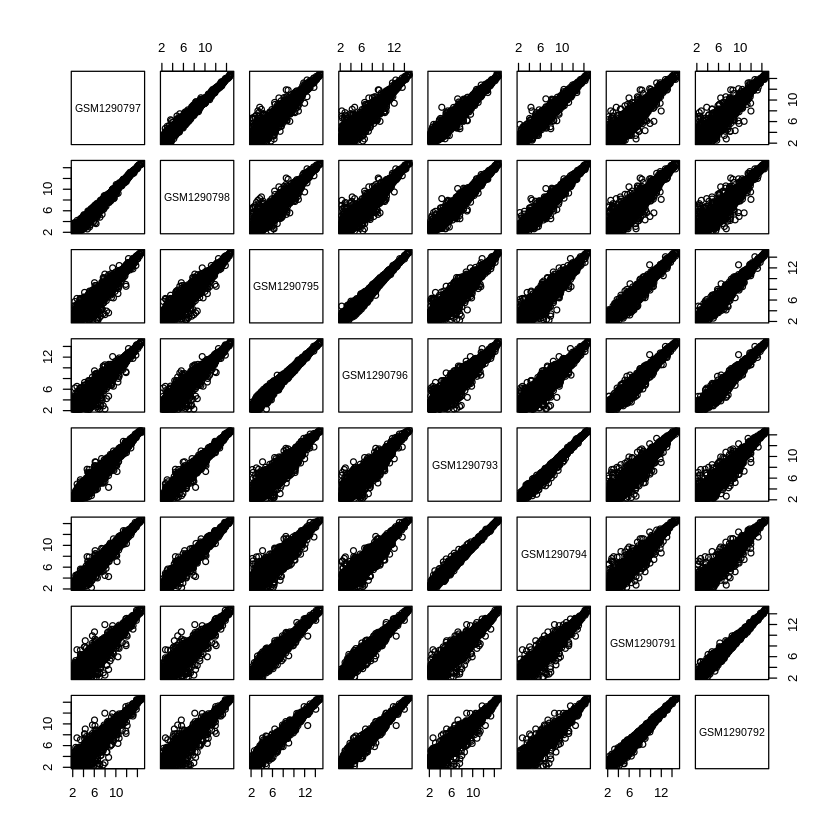

In [ ]:
pairs(expdtgeoFilt)

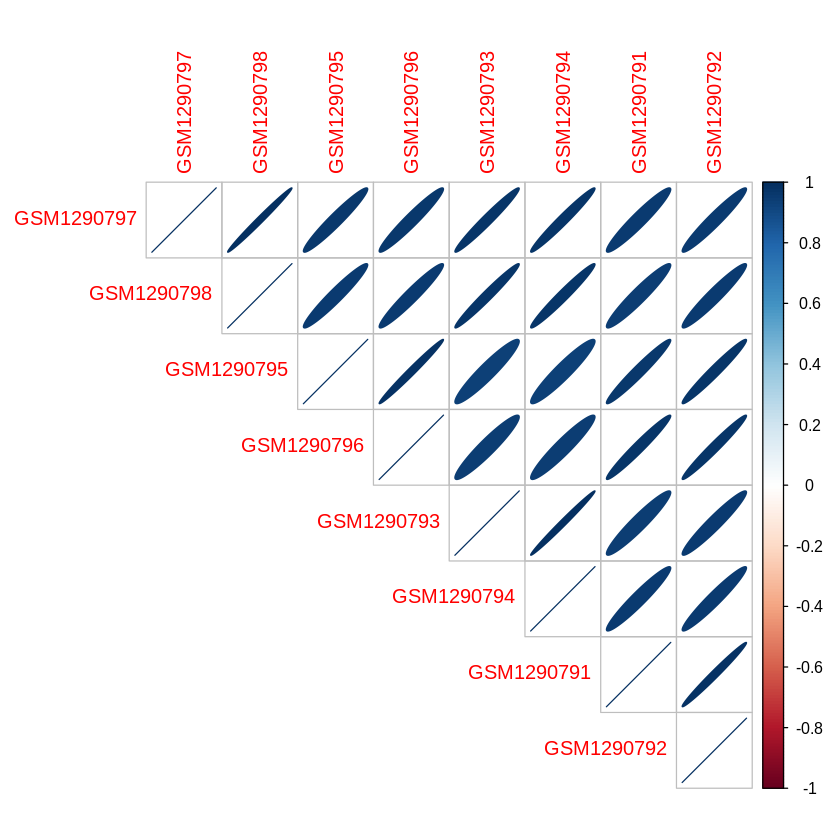

In [ ]:
corrplot(cor(expdtgeoFilt), method='ellipse',type='upper')

207078_at   204212_at 209028_s_at 202382_s_at   203256_at 210458_s_at 
          2           3           2           3           3           2 
  221847_at 206846_s_at   219442_at 216379_x_at 217746_s_at 222380_s_at 
          1           2           2           1           1           3 
  222343_at   219889_at    43544_at   209707_at 216862_s_at 218118_s_at 
          2           3           3           3           1           1 
  219987_at 221963_x_at 203976_s_at 214086_s_at 212596_s_at 219513_s_at 
          3           3           2           3           3           2 
  205088_at 216125_s_at 209015_s_at 215009_s_at   214857_at   213698_at 
          2           3           3           3           3           3 
  209925_at 217499_x_at   213685_at   205904_at 201663_s_at   218261_at 
          2           3           2           1           3           3 
201177_s_at 217946_s_at 209380_s_at   203192_at 203105_s_at 209247_s_at 
          1           1           3           2           3           3 
  203880_at 218143_s_at   201771_at 218377_s_at 218567_x_at 207438_s_at 
          1           3           3           3           1           2 
208598_s_at 211320_s_at   212062_at 210499_s_at 219625_s_at 205139_s_at 
          1           2           3           2           3           2 
211963_s_at 217818_s_at   208736_at   201954_at   213102_at 200727_s_at 
          1           3           1           1           3           3 
  209890_at 200973_s_at 220375_s_at   218227_at   214331_at   209114_at 
          2           1           2           3           2           3 
  201489_at 208735_s_at 208679_s_at   209349_at   218755_at 217861_s_at 
          1           2           1           2           3           3 
  212374_at 200720_s_at   202207_at 205020_s_at   204008_at   203707_at 
          2           3           2           3           2           3 
211971_s_at 207668_x_at   201391_at 202074_s_at   200837_at 217739_s_at 
          1           1           1           3           1           3 
  212170_at 206238_s_at 203174_s_at   202704_at 221953_s_at 210962_s_at 
          2           3           2           1           3           3 
217047_s_at   201503_at   212000_at   206002_at   203640_at 207268_x_at 
          2           1           2           2           3           3 
  203341_at   213241_at   200990_at   212706_at 210852_s_at 201443_s_at 
          1           2           3           2           2           1 
  201910_at   202793_at   221725_at   203775_at   218653_at 217756_x_at 
          3           3           3           3           1           1 
211804_s_at 218544_s_at   209253_at   201653_at   218379_at 201394_s_at 
          3           3           3           1           3           3 
  212658_at 218656_s_at   216439_at 202246_s_at 203008_x_at   219880_at 
          3           3           2           1           1           2 
201962_s_at 207396_s_at   213320_at 200987_x_at   206205_at 214895_s_at 
          2           2           3           3           2           3 
204247_s_at   203740_at   205851_at 206463_s_at   202397_at 203659_s_at 
          3           3           2           2           1           2 
  204190_at 212227_x_at 204071_s_at 208749_x_at 201584_s_at   212296_at 
          3           1           3           3           1           1 
201906_s_at 211297_s_at 216860_s_at   202241_at 202122_s_at   209215_at 
          2           3           2           3           3           3 
  212799_at   209745_at   206076_at 208766_s_at   202433_at 209592_s_at 
          3           2           2           1           1           2 
  204831_at   212603_at 210817_s_at 220773_s_at   203150_at   203342_at 
          3           1           3           3           3           3 
203790_s_at   209482_at   203198_at 201225_s_at   212558_at 215044_s_at 
          1           1           3           1           2           2 
  204740_at 202284_s_at   203252_at   210239_at   204916_at 

[1] 1446 1949 2926

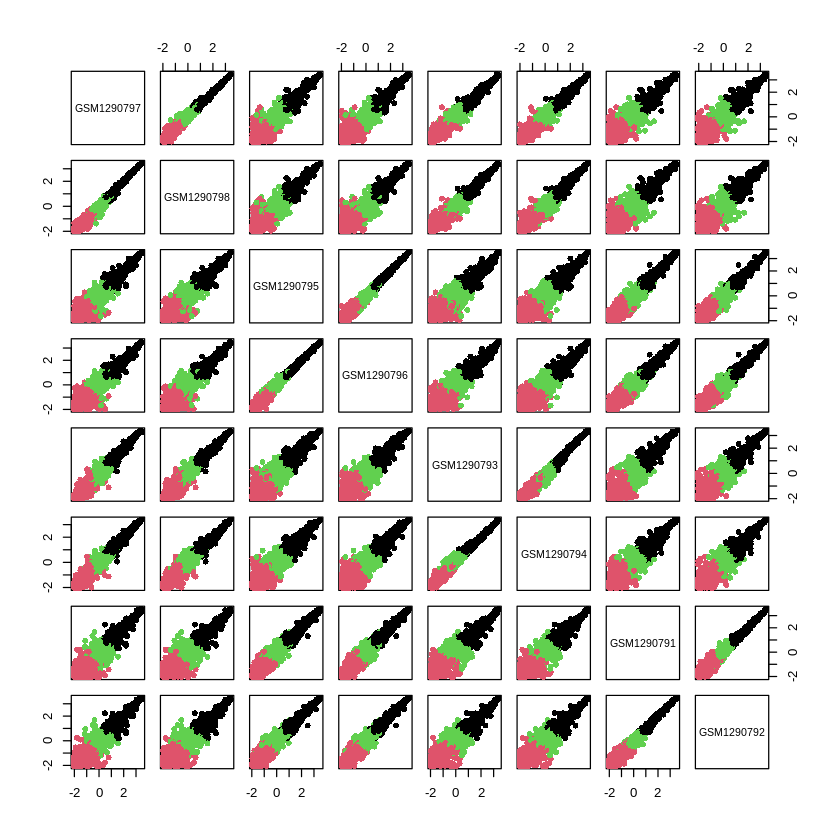

In [ ]:
expdtScale<-scale(expdtgeoFilt, scale=T)
set.seed(123)
kMres<-kmeans(expdtScale,centers=3)
kMres$cluster

kMres$size

pairs(expdtScale, col=c(1:3)[kMres$cluster],pch=16)

In [ ]:
?pairs

In [ ]:
set.seed(12)
kMres1 <- kmeans(expdtScale, centers=3)
head(kMres1$cluster)

207078_at   204212_at 209028_s_at 202382_s_at   203256_at 210458_s_at 
          3           1           3           1           1           3

In [ ]:
kMres2 <- kmeans(expdtScale, centers=3)
head(kMres2$cluster)

207078_at   204212_at 209028_s_at 202382_s_at   203256_at 210458_s_at 
          1           3           1           3           3           1

In [ ]:
table(kMres1$cluster, kMres2$cluster)

   
       1    2    3
  1    0    0 2926
  2    0 1446    0
  3 1949    0    0

#Hierarchial Clustering

Hierarchical Clustering akan mengelompokkan objek-objek yang mirip pada hirarki yang berdekatan dan objek-objek yang tidak mirip pada hirarki yang berjauhan.

In [ ]:
##hierarichal clustering
#Untuk melakukan analisa klaster dengan R hal pertama yang harus dilakukan adalah menghitung distance/jarak antar observasi.
distexpdt <- dist(expdtScale)

In [ ]:
#single linkage (menggunakan jarak terkecil antara satu objek dalam klaster dengan satu objek dalam cluster yang lain.)
res1 <- hclust(distexpdt, method = "single")

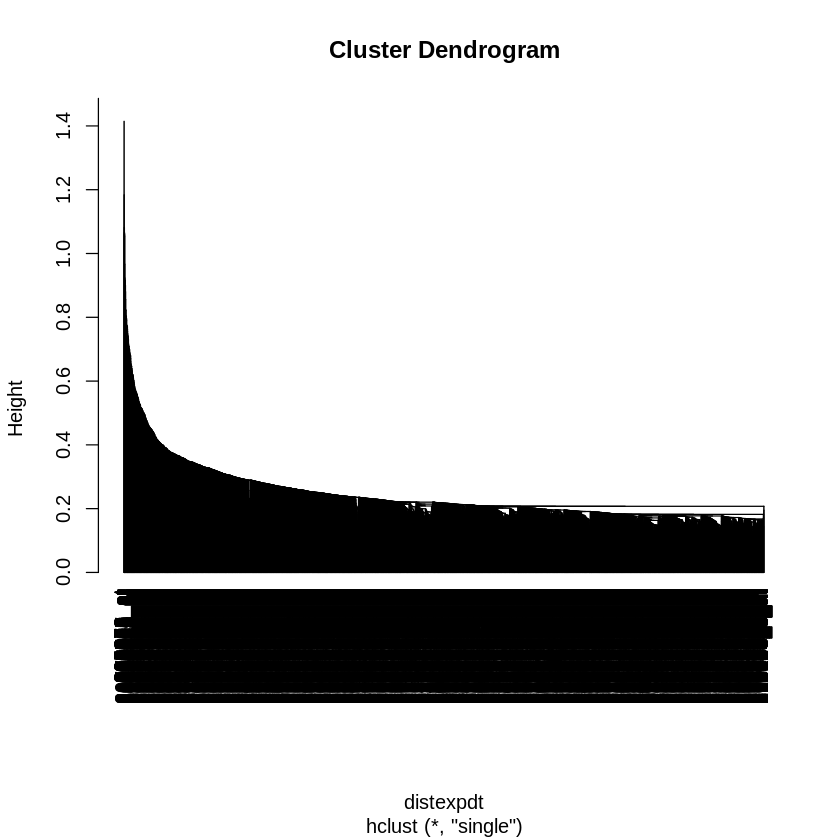

In [ ]:
#dendogram
plot(res1, hang = -2, cex = 1)

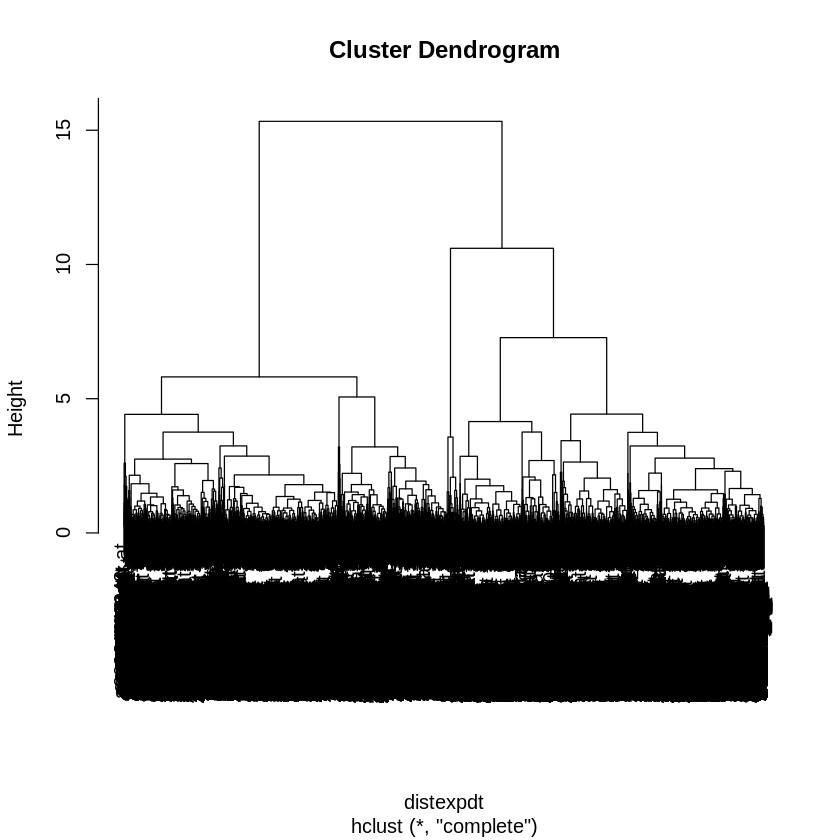

In [ ]:
# Complete linkage (menggunakan jarak terbesar antara satu objek dalam klaster dengan satu objek dalam cluster yang lain.)
res2 <- hclust(distexpdt, method="complete")
plot(res2)

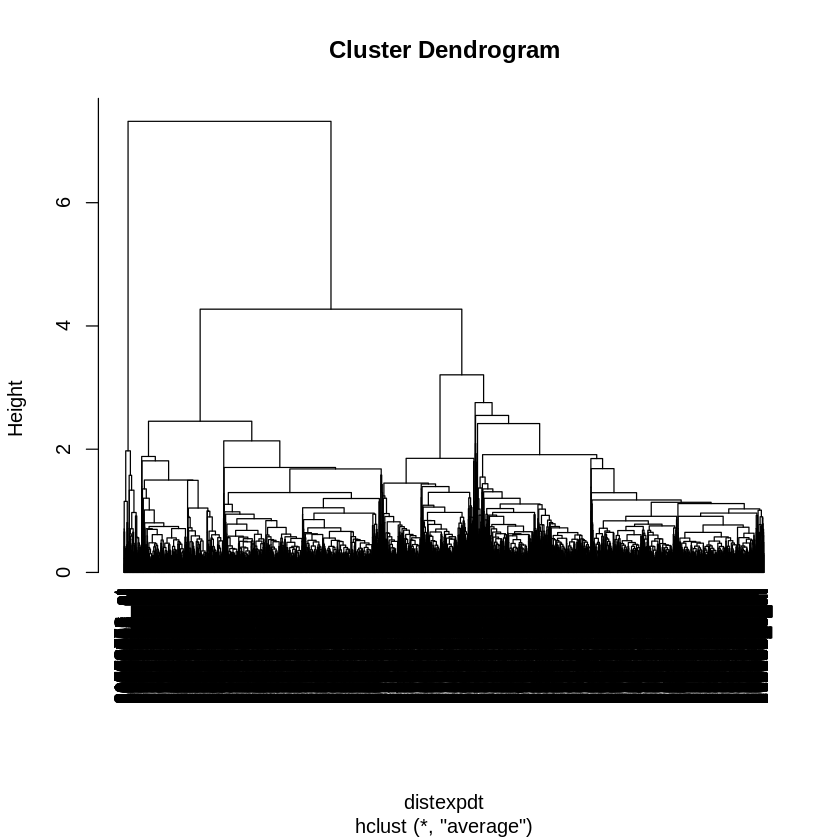

In [ ]:
#average linkage (menggunakan jarak rata-rata antar objek-objek dalam satu klaster dengan objek-objek dalam klaster lain.)
res3 <- hclust(distexpdt, method = "average")
plot(res3, hang=-2)

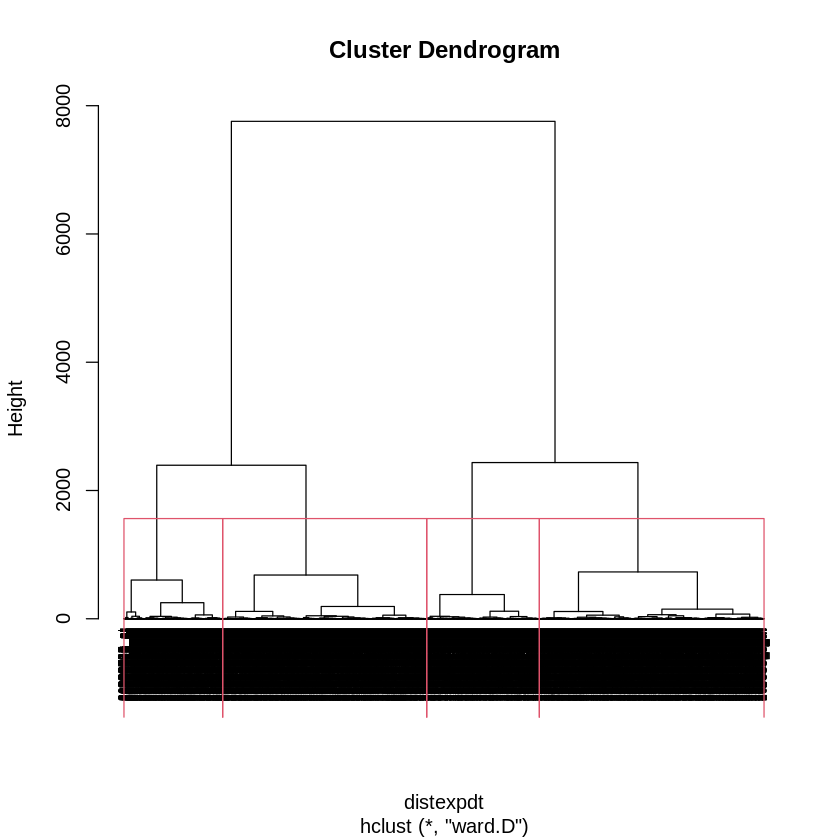

In [ ]:
#word linkage ( metode tidak hanya berdasarkan jarak antar observasi, tetapi juga memperhatikan keragaman dari klaster tersebut dengan meminimalkan nilai Sum of Squared Eror (SSE). Dua klaster digabungkan ketika memberikan nilai SSE yang paling kecil/minimal)
res4 <- hclust(distexpdt, method="ward.D")

plot(res4, hang=-1, cex = 0.6)
rect.hclust(res4, k=4) #rectangle for 4 clusters

In [ ]:
#the clustering member (k=4)
cutree(res4, k=4)

207078_at   204212_at 209028_s_at 202382_s_at   203256_at 210458_s_at 
          1           2           3           3           2           1 
  221847_at 206846_s_at   219442_at 216379_x_at 217746_s_at 222380_s_at 
          2           3           1           4           4           3 
  222343_at   219889_at    43544_at   209707_at 216862_s_at 218118_s_at 
          1           3           2           3           4           2 
  219987_at 221963_x_at 203976_s_at 214086_s_at 212596_s_at 219513_s_at 
          2           3           1           2           2           1 
  205088_at 216125_s_at 209015_s_at 215009_s_at   214857_at   213698_at 
          1           3           3           3           3           2 
  209925_at 217499_x_at   213685_at   205904_at 201663_s_at   218261_at 
          3           2           1           2           2           2 
201177_s_at 217946_s_at 209380_s_at   203192_at 203105_s_at 209247_s_at 
          4           4           2           1           2           3 
  203880_at 218143_s_at   201771_at 218377_s_at 218567_x_at 207438_s_at 
          4           3           2           2           2           3 
208598_s_at 211320_s_at   212062_at 210499_s_at 219625_s_at 205139_s_at 
          2           3           2           3           3           3 
211963_s_at 217818_s_at   208736_at   201954_at   213102_at 200727_s_at 
          4           2           4           4           2           2 
  209890_at 200973_s_at 220375_s_at   218227_at   214331_at   209114_at 
          1           4           3           2           3           3 
  201489_at 208735_s_at 208679_s_at   209349_at   218755_at 217861_s_at 
          4           3           4           3           2           2 
  212374_at 200720_s_at   202207_at 205020_s_at   204008_at   203707_at 
          1           2           1           3           1           2 
211971_s_at 207668_x_at   201391_at 202074_s_at   200837_at 217739_s_at 
          4           4           4           3           4           2 
  212170_at 206238_s_at 203174_s_at   202704_at 221953_s_at 210962_s_at 
          3           3           3           4           3           2 
217047_s_at   201503_at   212000_at   206002_at   203640_at 207268_x_at 
          1           4           3           1           3           3 
  203341_at   213241_at   200990_at   212706_at 210852_s_at 201443_s_at 
          4           1           2           1           1           4 
  201910_at   202793_at   221725_at   203775_at   218653_at 217756_x_at 
          3           3           3           2           2           4 
211804_s_at 218544_s_at   209253_at   201653_at   218379_at 201394_s_at 
          3           3           3           4           3           2 
  212658_at 218656_s_at   216439_at 202246_s_at 203008_x_at   219880_at 
          3           2           1           4           2           3 
201962_s_at 207396_s_at   213320_at 200987_x_at   206205_at 214895_s_at 
          3           3           3           3           3           3 
204247_s_at   203740_at   205851_at 206463_s_at   202397_at 203659_s_at 
          3           2           1           1           4           3 
  204190_at 212227_x_at 204071_s_at 208749_x_at 201584_s_at   212296_at 
          2           4           2           2           4           4 
201906_s_at 211297_s_at 216860_s_at   202241_at 202122_s_at   209215_at 
          3           2           3           2           2           2 
  212799_at   209745_at   206076_at 208766_s_at   202433_at 209592_s_at 
          2           3           1           4           2           3 
  204831_at   212603_at 210817_s_at 220773_s_at   203150_at   203342_at 
          2           2           2           3           2           2 
203790_s_at   209482_at   203198_at 201225_s_at   212558_at 215044_s_at 
          2           4           3           4           1           3 
  204740_at 202284_s_at   203252_at   210239_at   204916_at 

In [ ]:
#convert hclustinto a dendogram and plot
res4.a <- as.dendrogram(res4)

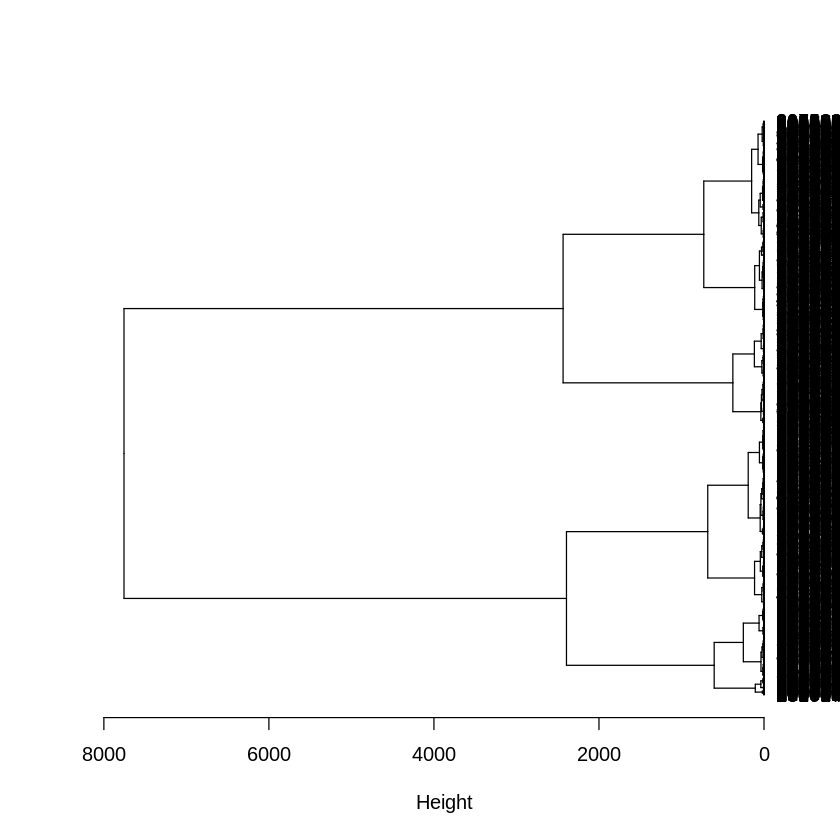

In [ ]:
#horizontal plot
plot(res4.a, xlab = "Height", horiz = TRUE)

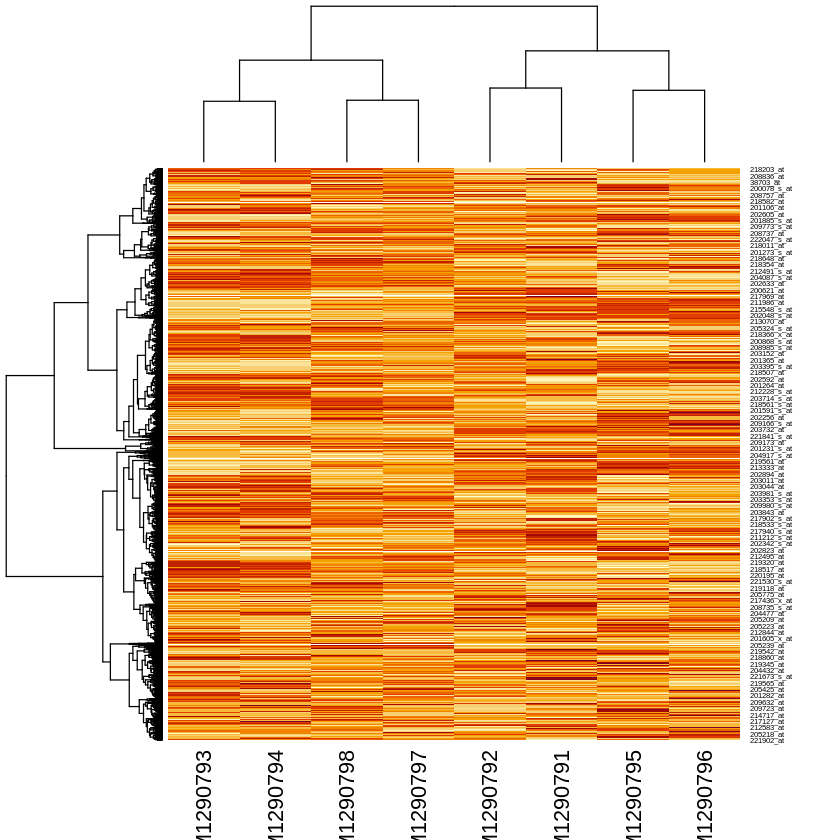

In [ ]:
heatmap(expdtScale)

In [ ]:
#Eda disini yah

#Cluster Validation

Kita ingin mencari jumlah cluster yang terbaik untuk data ini, hal ini dapat dilakukan dengan menghitung variasi dalam kluster.

In [ ]:
library(cluster)
set.seed(123)
gap_stat <-clusGap(expdtScale, FUN=kmeans, nstart = 25, K.max = 10, B= 50)

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps ex

In [ ]:
#Print hasilnya
print(gap_stat, method="firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = expdtScale, FUNcluster = kmeans, K.max = 10, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 10
          logW   E.logW       gap      SE.sim
 [1,] 8.554397 9.177387 0.6229893 0.004638853
 [2,] 8.085717 8.746135 0.6604185 0.003627193
 [3,] 7.796968 8.580547 0.7835798 0.002017917
 [4,] 7.614520 8.500365 0.8858448 0.002600967
 [5,] 7.481981 8.449979 0.9679981 0.002318412
 [6,] 7.372945 8.400663 1.0277182 0.002509547
 [7,] 7.305477 8.353772 1.0482954 0.002160961
 [8,] 7.240639 8.311212 1.0705736 0.002304775
 [9,] 7.191069 8.278103 1.0870340 0.002283619
[10,] 7.152331 8.251364 1.0990329 0.002478167


In [ ]:
clusGap(x=expdtScale, FUNcluster = kmeans, K.max = 10, B=50, nstart=25)

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 316050)”
Warning message:
“did not converge in 10 iterations”


Clustering Gap statistic ["clusGap"] from call:
clusGap(x = expdtScale, FUNcluster = kmeans, K.max = 10, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstSEmax', SE.factor=1): 10
          logW   E.logW       gap      SE.sim
 [1,] 8.554397 9.178188 0.6237906 0.004906067
 [2,] 8.085717 8.746897 0.6611800 0.003637733
 [3,] 7.796968 8.581219 0.7842508 0.002638439
 [4,] 7.614520 8.501031 0.8865101 0.002369950
 [5,] 7.481981 8.450397 0.9684158 0.002599792
 [6,] 7.372945 8.400972 1.0280278 0.002443649
 [7,] 7.305477 8.354115 1.0486378 0.001931040
 [8,] 7.240804 8.311605 1.0708003 0.002167111
 [9,] 7.191069 8.278090 1.0870209 0.002347183
[10,] 7.152331 8.251394 1.0990639 0.002625526

Dari hasil diatas terlihat kolom pertama dan kedua masing-masing adalah nilai log Wk dan log Wkb yang dilanjutkan dengan gap statistic dan standar error dari gap statistic. Untuk menentukan jumlah klaster yang optimal dengan menggunakan plot berikut:

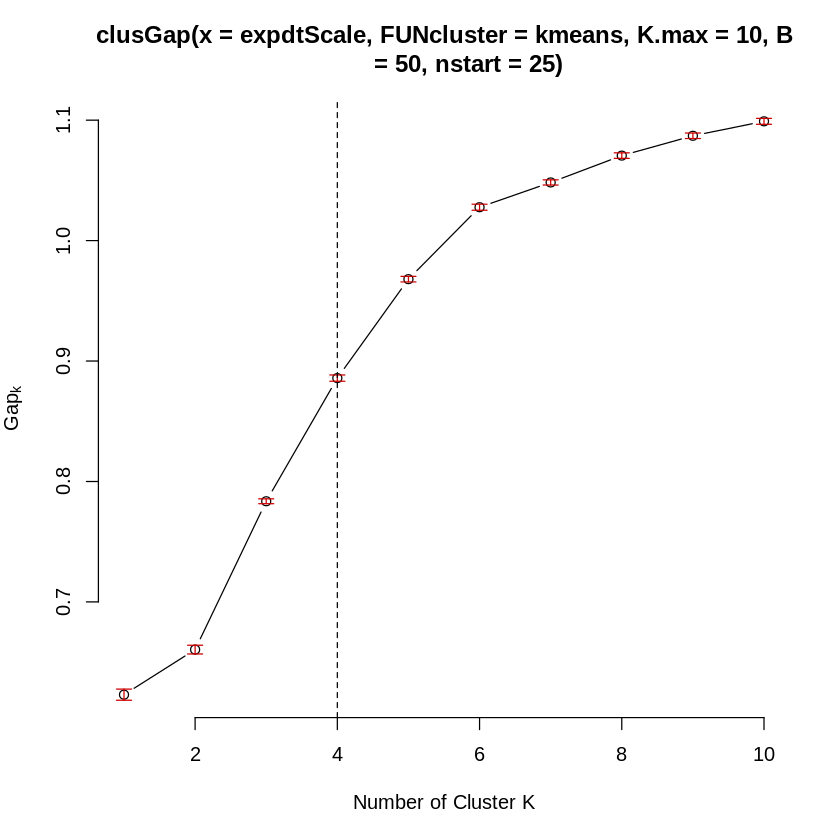

In [ ]:
#Plot gap statistics
plot(gap_stat, frame = FALSE, xlab="Number of Cluster K")
abline(v= 4, lty =2)

Dari hasil grafik dapat dilihat bahwa nilai k yang paling optimal kurang jelas, hal ini dapat terjadi dikarenakan jumlah gen yang terlalu banyak tetapi kita akan mengambil nilai k=4 dikarenakan cukup mendekati jumlah cluster yang terbaik.

#Cluster Profiling

Setelah mengetahui jumlah cluster yang optimal kita akan memberikan nama atau profil dari cluster tersebut berdasarkan karakteristiknya. Berikut kita akan menampilkannya dengan scatter plot.

In [ ]:
kMres2 <- kmeans(expdtScale, centers=4)
head(kMres2$cluster)

207078_at   204212_at 209028_s_at 202382_s_at   203256_at 210458_s_at 
          2           1           1           1           3           2

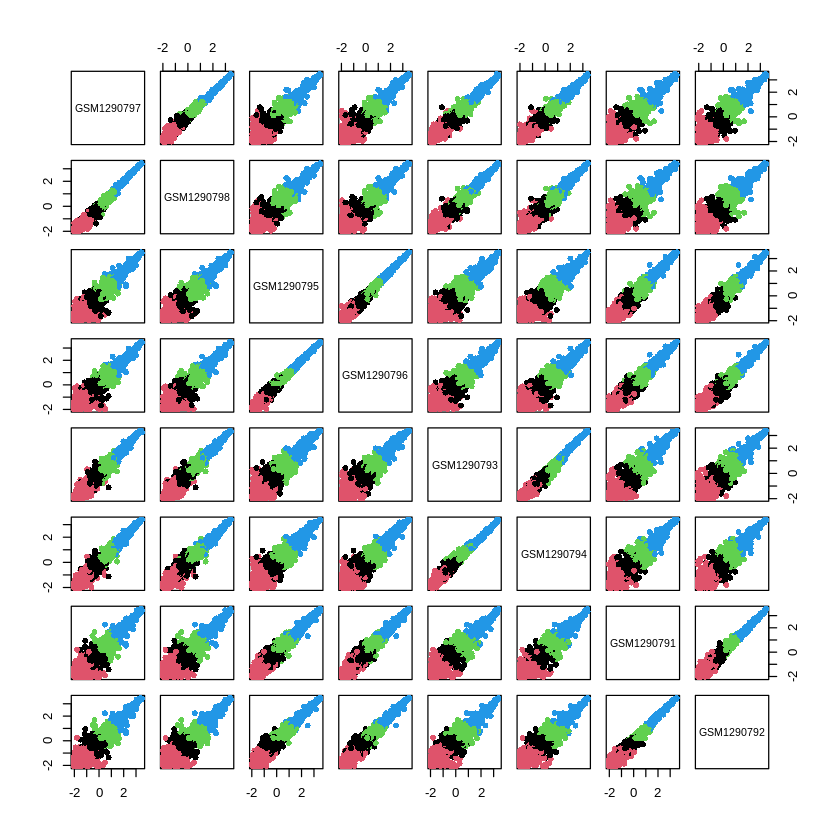

In [ ]:
pairs(expdtScale, col=c(1:4)[kMres2$cluster],pch=16)

#Biplot

Lalu kita akan menampilkan hasil klaster dan melihat variabel apa aja yang berkaitan dengan kluster tersebut yang akan membantu penamaan kluster yang terbentuk dengan biplot.

In [ ]:
pca <- prcomp(expdtgeoFilt, scale = T)
pca

Standard deviations (1, .., p=8):
[1] 2.78296960 0.36512638 0.23849166 0.14560027 0.11751711 0.11038073 0.10733592
[8] 0.07854956

Rotation (n x k) = (8 x 8):
                 PC1        PC2        PC3         PC4         PC5        PC6
GSM1290797 0.3549199  0.2499573 -0.3687974 -0.39515478 -0.10433193 -0.0759619
GSM1290798 0.3543581  0.2846680 -0.3977110 -0.38043673 -0.00387436  0.1647454
GSM1290795 0.3526974 -0.3912153 -0.3539584  0.39978427  0.46169728  0.4392572
GSM1290796 0.3533384 -0.3920333 -0.2591803  0.26604112 -0.32512265 -0.6611653
GSM1290793 0.3526592  0.4473964  0.2146756  0.41516580 -0.06492582  0.1730600
GSM1290794 0.3531414  0.4061417  0.3176873  0.25687009  0.20619611 -0.3077472
GSM1290791 0.3528429 -0.3252502  0.4772180 -0.47195973  0.46933970 -0.1637116
GSM1290792 0.3544620 -0.2807913  0.3722977 -0.08616488 -0.63499510  0.4307466
                  PC7         PC8
GSM1290797 -0.5617537  0.43263363
GSM1290798  0.5142661 -0.44594023
GSM1290795 -0.1732282 -0.03635759
GSM

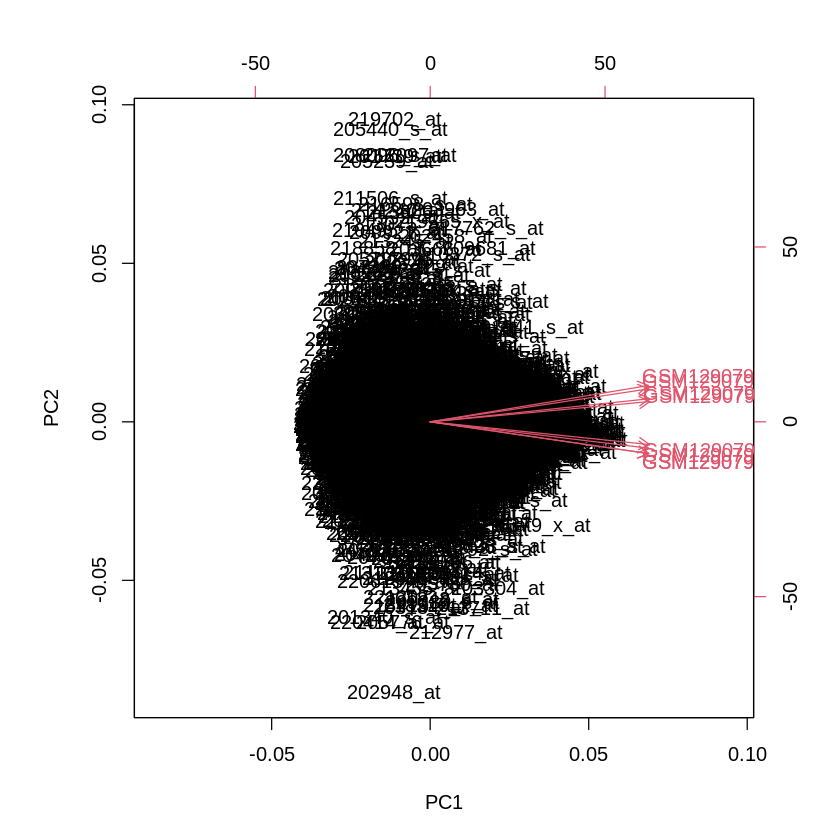

In [ ]:
biplot(pca)

Dari hasil-hasil grafik yang dilakukan sebelumnya dapat dilihat bahwa sulit sekali mendapatkan interpertasi ataupun dibaca dikarenakan begitu banyak gen yang ada maka akan dilakukan pemrosesan data lebih lanjut agar dapat dihasilkan grafik yang dapat diinterpertasi.

In [ ]:
#lanjut file bu dewi disini

#FILE BU DEWI

#1 Hierarchical clustering of samples

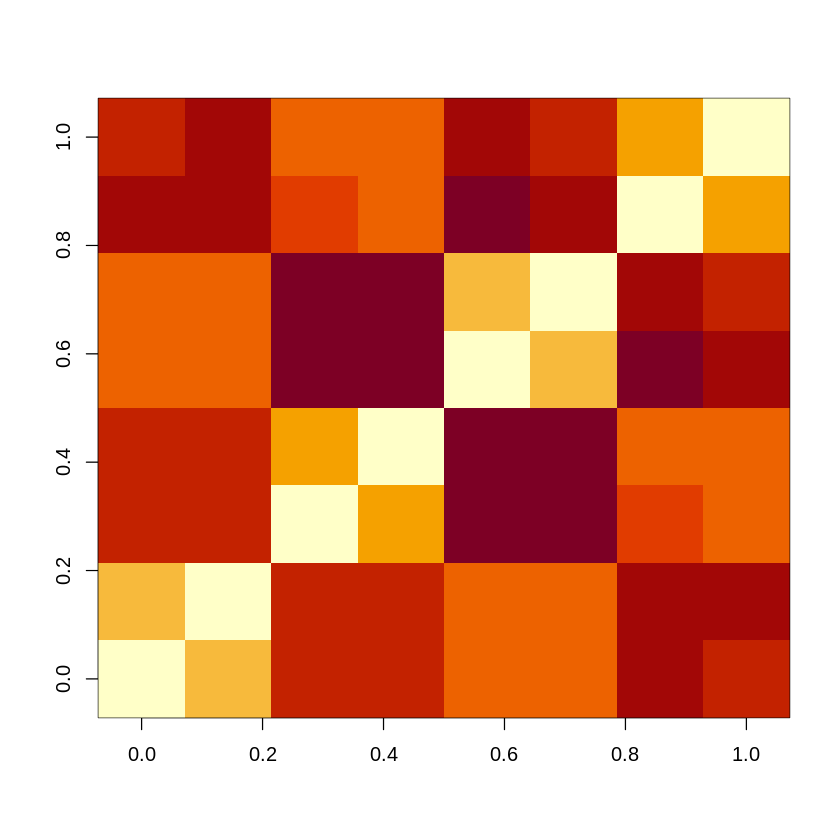

In [ ]:
test <- phdtgeo[, 2]

d <- dist(t(expdtgeoFilt))
image(as.matrix(d))

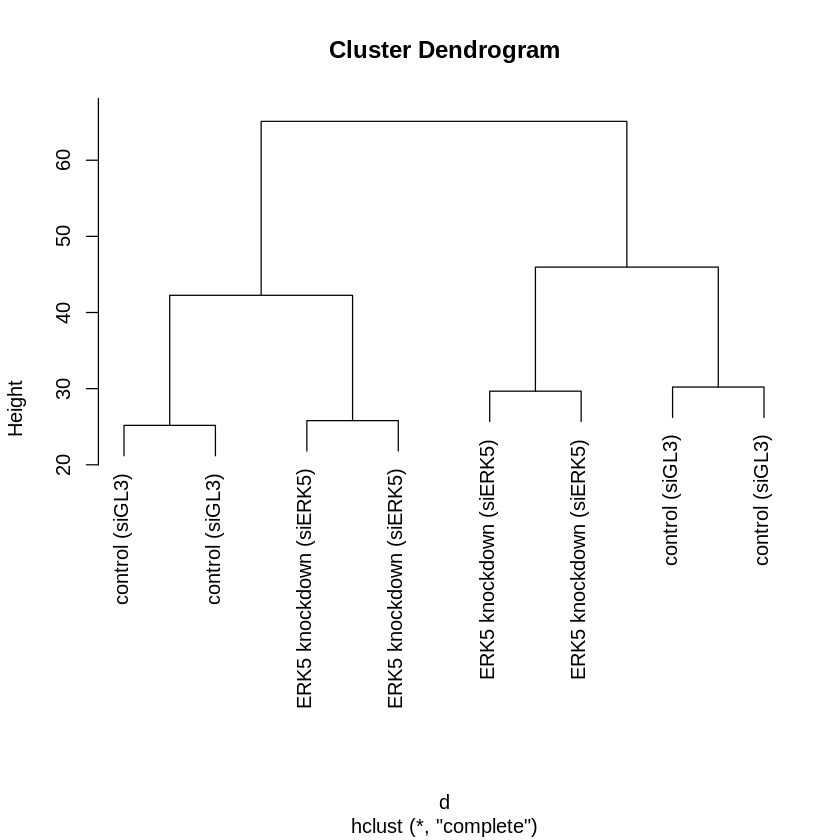

In [ ]:
hc <- hclust(d, method = "complete")
plot(hc, labels = test)

dendrogram ini membagi menjadi 2 cluster.

In [ ]:
groups <- cutree(hc, k = 2)
table(groups, test)

fisher.test(groups, test)$p.value

      test
groups control (siGL3) ERK5 knockdown (siERK5)
     1               2                       2
     2               2                       2

[1] 1

dari hasil fisher test, didapatkan bahwa kedua jenis grup tersebut tidak terpisah dengan baik. hal ini ditandakan dengan p-value = 1 > 0.05

#2 Gene selection before clustering samples

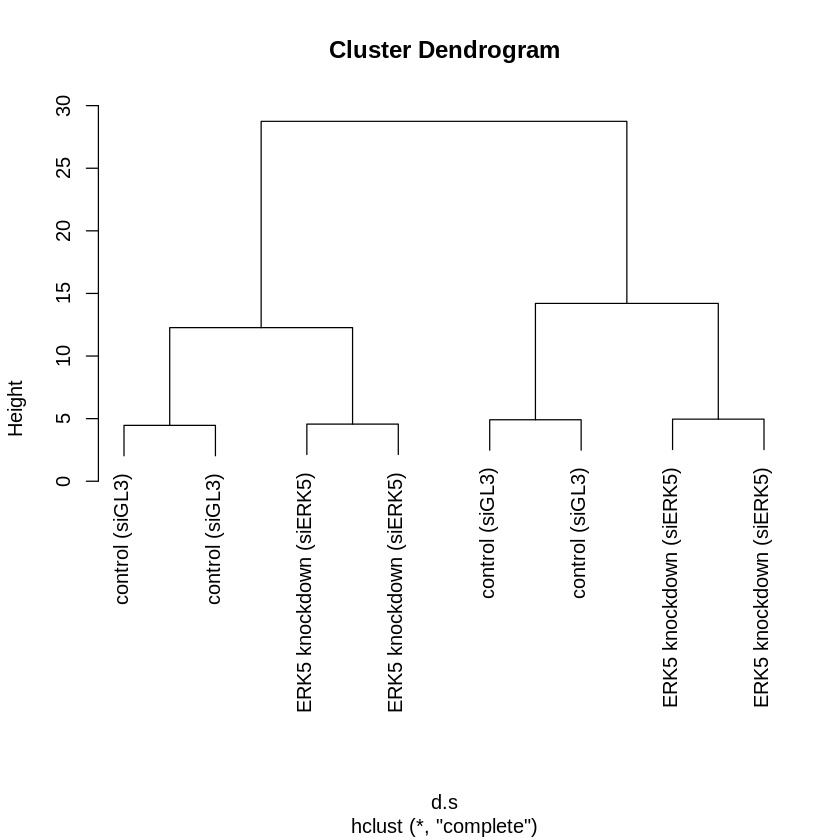

In [ ]:
dat <- expdtgeoFilt

genes.var <- apply(dat, 1, var)
genes.var.select <- order(-genes.var)[1:100]
dat.s <- dat[genes.var.select, ]
d.s <- dist(t(dat.s))
hc.s <- hclust(d.s, method = "complete")
plot(hc.s, labels = test)

In [ ]:
groups.s <- cutree(hc.s, k = 2)
table(groups.s, test)

        test
groups.s control (siGL3) ERK5 knockdown (siERK5)
       1               2                       2
       2               2                       2

In [ ]:
fisher.test(groups.s, test)$p.value

[1] 1

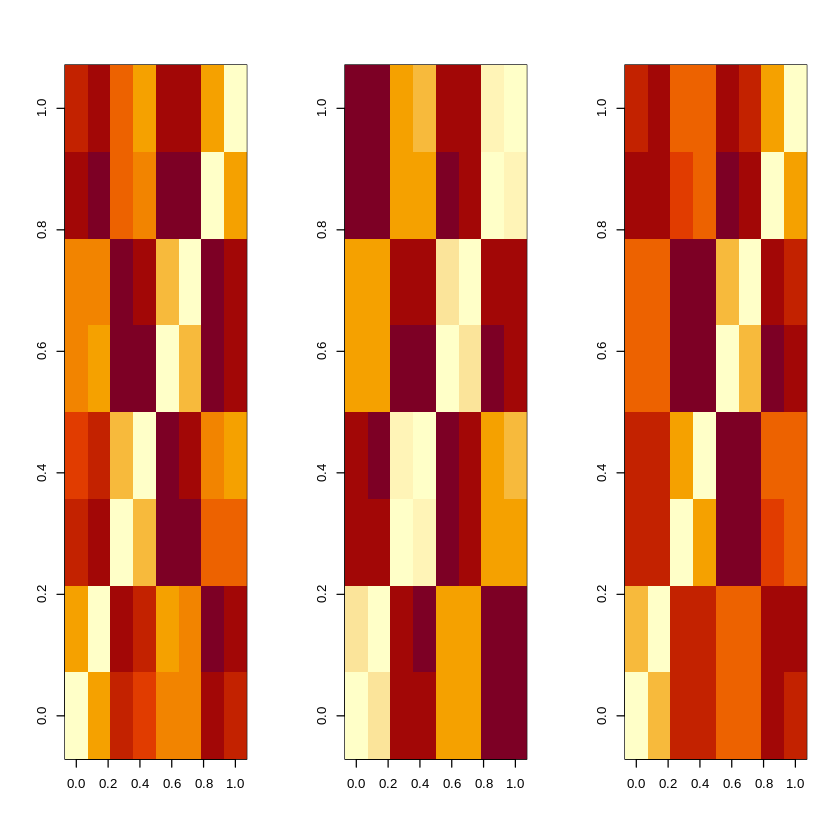

In [ ]:
set.seed(777)

genes.random.select <- sample(nrow(dat), 100)
dat.r <- dat[genes.random.select, ]
d.r <- dist(t(dat.r))


par(mfrow = c(1, 3))
image(as.matrix(d.r))
image(as.matrix(d.s))
image(as.matrix(d))

heatmap diatas menampilkan pola yang mirip

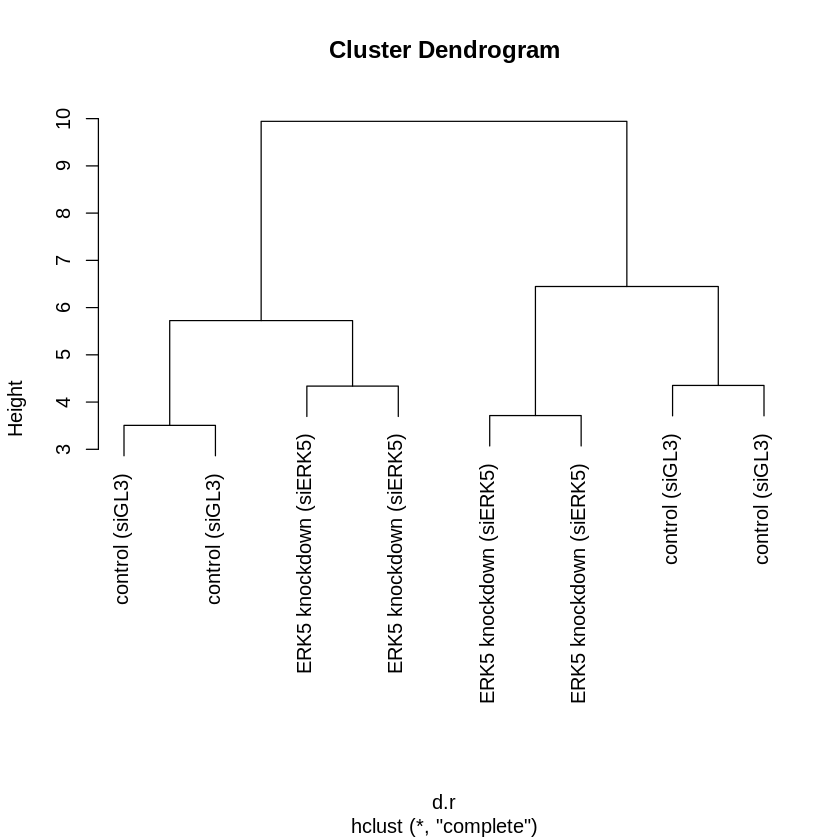

In [ ]:
par(mfrow = c(1, 1))
hc.r <- hclust(d.r, method = "complete")
plot(hc.r, labels = test)

In [ ]:
groups.r <- cutree(hc.r, k = 2)
table(groups.r, test)

        test
groups.r control (siGL3) ERK5 knockdown (siERK5)
       1               2                       2
       2               2                       2

In [ ]:
fisher.test(groups.r, test)$p.value

[1] 1

kolom dikurangi menjadi 8 agar PCA dapat dilakukan.

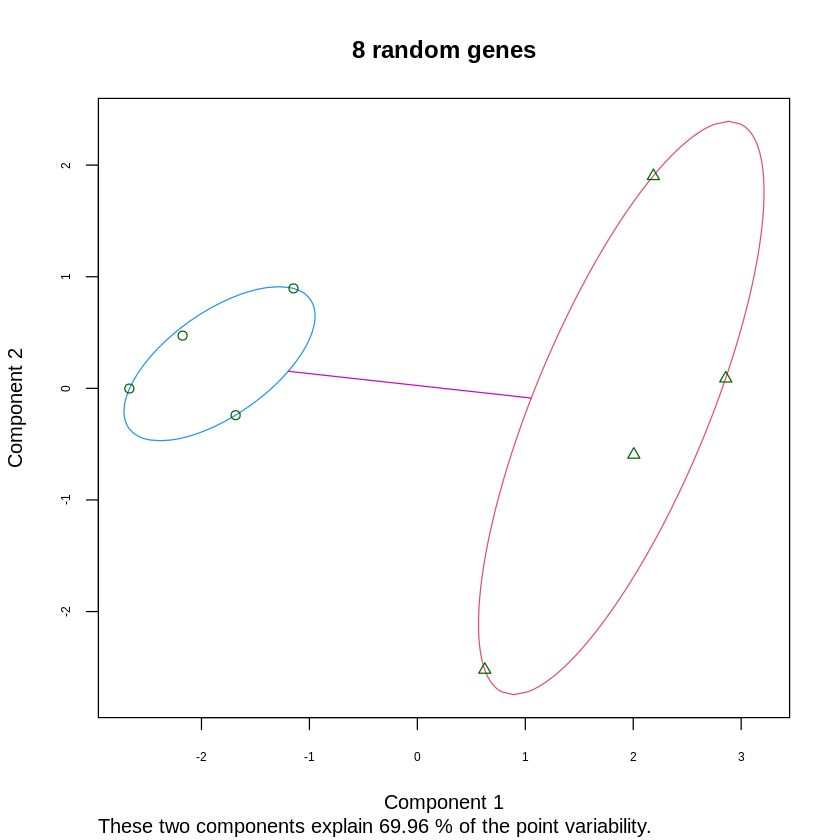

In [ ]:
library(cluster)
clusplot(t(dat.r)[, 1:8], clus = groups.r, main = "8 random genes", cex.axis = 0.6, color = TRUE)

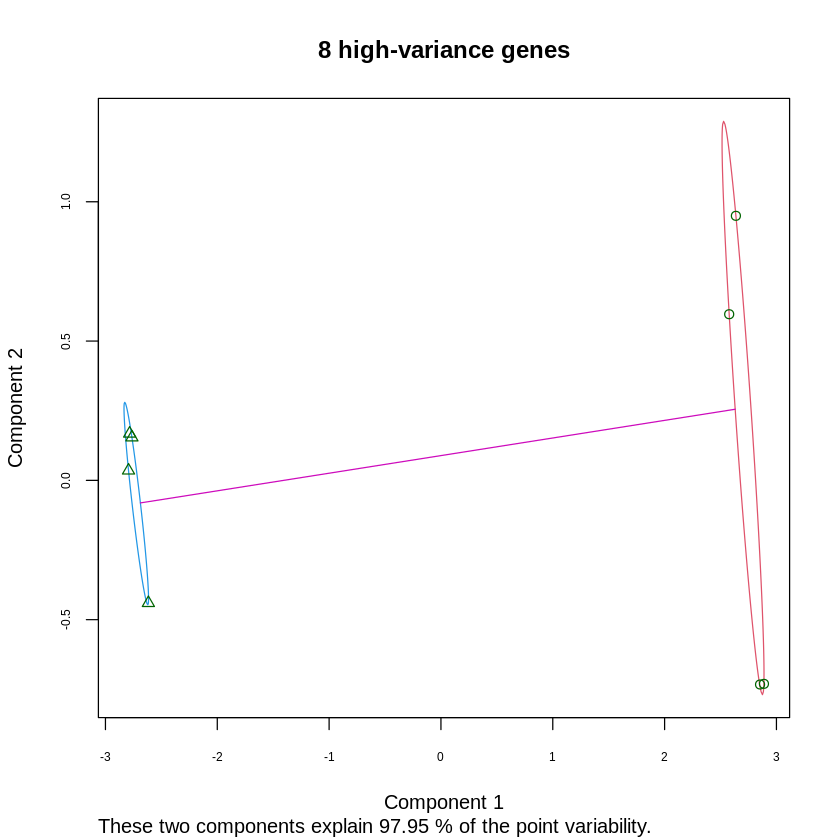

In [ ]:
clusplot(t(dat.s)[, 1:8], clus = groups.s, main = "8 high-variance genes", cex.axis = 0.6, color = TRUE)

#3 Partitioning methods

##3.1 k-means

In [ ]:
k <- 2
withinss <- Inf
for (i in 1:10){
  kmeans.run <- kmeans(t(dat), k)
  print(sum(kmeans.run$withinss))
  print(table(kmeans.run$cluster, test))
  cat("----\n")
  if (sum(kmeans.run$withinss) < withinss) {
    result <- kmeans.run
    withinss <- sum(result$withinss)}
}


[1] 4246.178
   test
    control (siGL3) ERK5 knockdown (siERK5)
  1               2                       2
  2               2                       2
----
[1] 4246.178
   test
    control (siGL3) ERK5 knockdown (siERK5)
  1               2                       2
  2               2                       2
----
[1] 4246.178
   test
    control (siGL3) ERK5 knockdown (siERK5)
  1               2                       2
  2               2                       2
----
[1] 4246.178
   test
    control (siGL3) ERK5 knockdown (siERK5)
  1               2                       2
  2               2                       2
----
[1] 4246.178
   test
    control (siGL3) ERK5 knockdown (siERK5)
  1               2                       2
  2               2                       2
----
[1] 4246.178
   test
    control (siGL3) ERK5 knockdown (siERK5)
  1               2                       2
  2               2                       2
----
[1] 4246.178
   test
    control (siGL3) ERK5 knockd

In [ ]:
table(result$cluster, test)

   test
    control (siGL3) ERK5 knockdown (siERK5)
  1               2                       2
  2               2                       2

In [ ]:
kmeans.s <- kmeans(t(dat.s), k)
table(kmeans.s$cluster, test)

   test
    control (siGL3) ERK5 knockdown (siERK5)
  1               2                       2
  2               2                       2

##3.2  PAM: Partitioning around medoids

In [ ]:
result <- pam(t(dat), k)
groups <- result$clustering
table(groups, test)

      test
groups control (siGL3) ERK5 knockdown (siERK5)
     1               2                       2
     2               2                       2

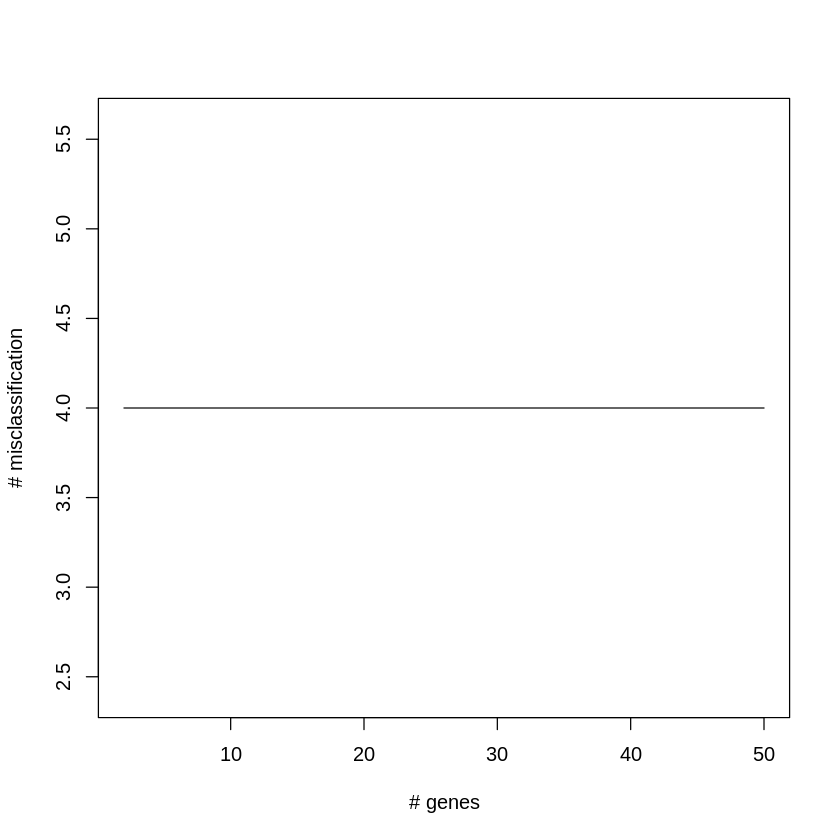

In [ ]:
ngenes <- 2:50
o <- order(genes.var, decreasing = TRUE)
miscl <- NULL
for (k in ngenes){
  dat.s2 <- dat[o[1:k], ]
  pam.result <- pam(t(dat.s2), k = 2)
  ct <- table(pam.result$clustering, test)
  miscl[k] <- min(ct[1, 2] + ct[2, 1], ct[1, 1] + ct[2, 2])
}
plot(ngenes, miscl[ngenes], type = "l", xlab = "# genes", ylab = "# misclassification")

#4 How many clusters are in the data?

##4.1 The objective function

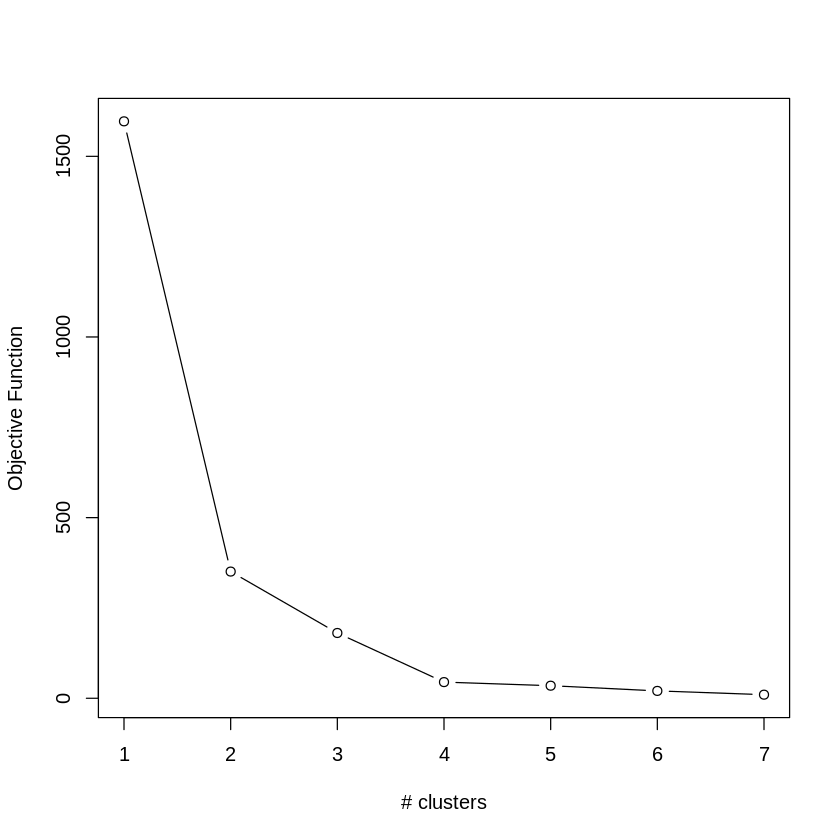

In [ ]:
totalsum <- sum(diag((ncol(dat.s) - 1)*cov(t(dat.s))))
withinss <- numeric()
withinss[1] <- totalsum
for (k in 2:7){
  withinss[k] <- sum(kmeans(t(dat.s), k)$withinss)
}
plot(1:7, withinss, xlab = "# clusters", ylab = "Objective Function", type = "b")

##4.2 The silhouette score

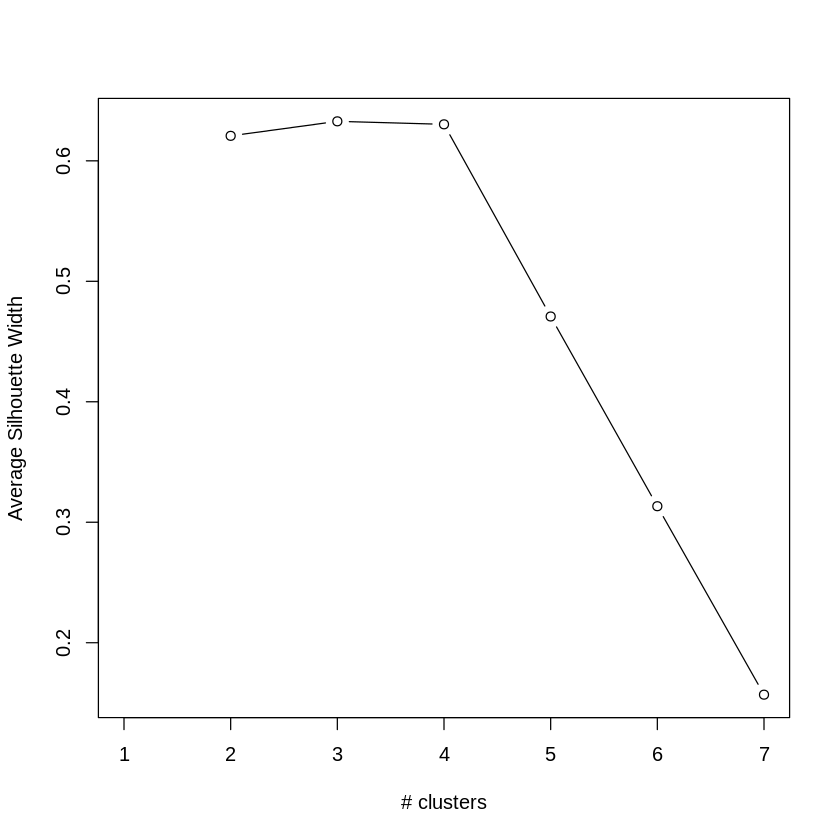

In [ ]:
asw <- numeric()
for (k in 2:7) {
  asw[k] <- pam(t(dat.s), k)$silinfo$avg.width
}
plot(1:7, asw, xlab = "# clusters", ylab = "Average Silhouette Width", type = "b")

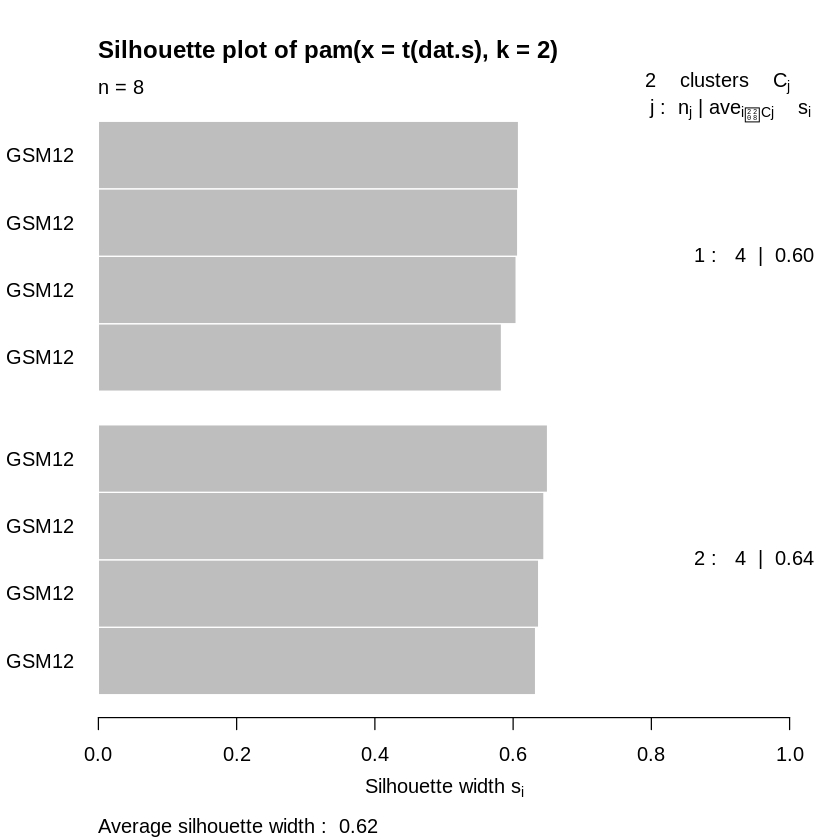

In [ ]:
plot(silhouette(pam(t(dat.s), 2)))

#5 How to check significance of clustering results

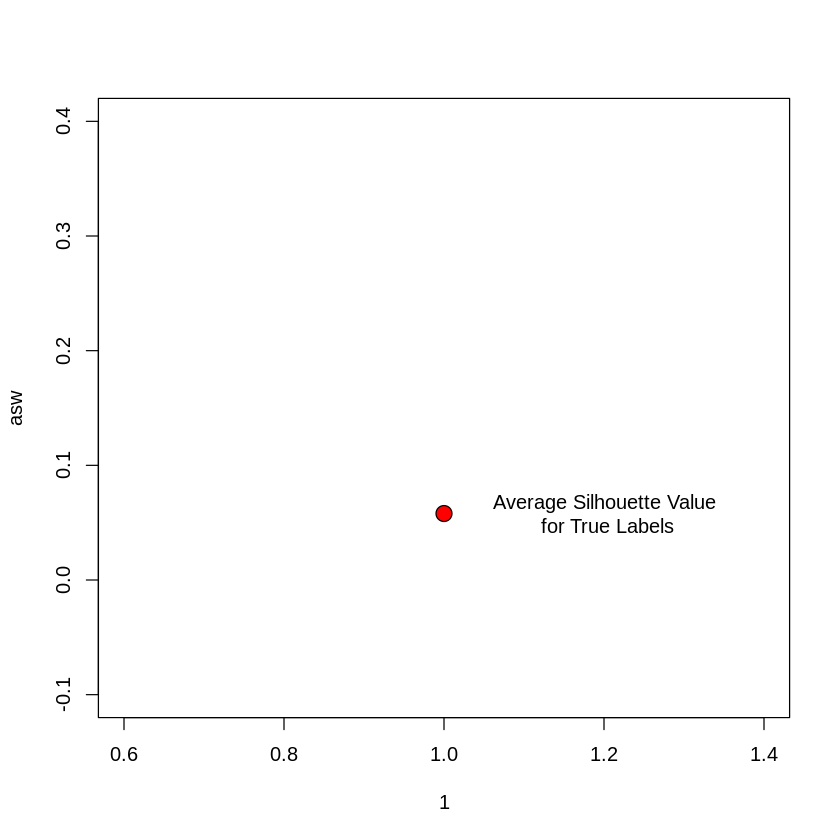

In [ ]:
d.s <- dist(t(dat.s))
test.true <- as.numeric(test=="ERK5 knockdown (siERK5)")
asw <- mean(silhouette(test.true, d.s)[, 3])
asw.random <- rep(0, 20)
for (sim in 1:20){
  test.random <- sample(test.true)
  asw.random[sim] <- mean(silhouette(test.random, d.s)[, 3])
}
symbols(1, asw, circles = 0.01, ylim = c(-0.1, 0.4), inches = FALSE, bg = "red")
text(1.2, asw, "Average Silhouette Value\n for True Labels")

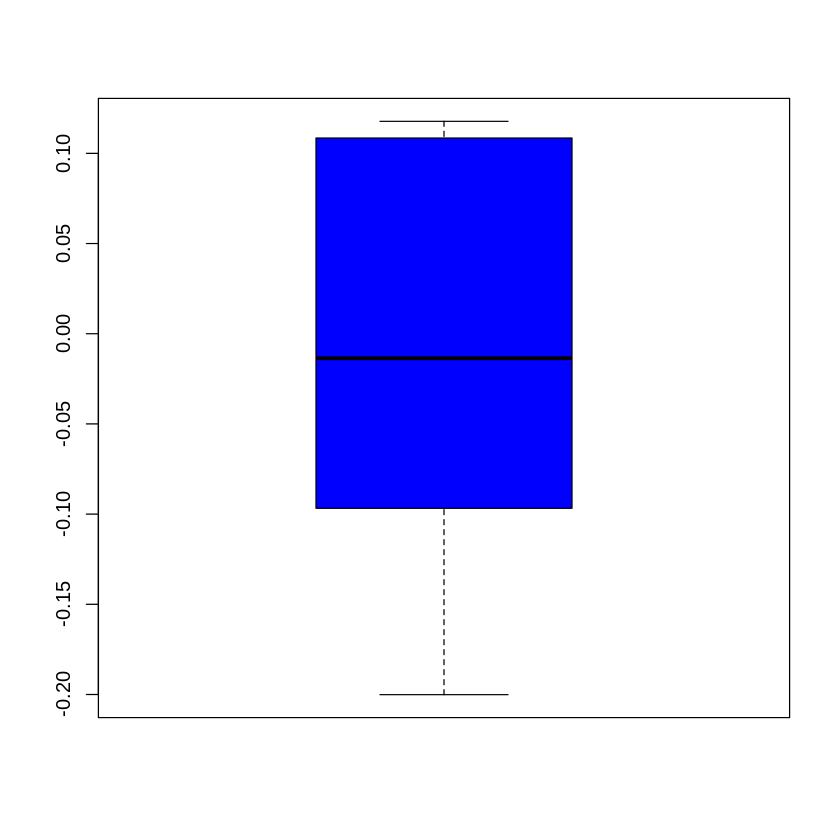

In [ ]:
boxplot(data.frame(asw.random), col = "blue", add = FALSE)

#Clustering of Genes

Hierarchical clustering dilakukan menggunakan 100 gen yang memiliki variansi tertinggi untuk mendapatkan wawasan yang lebih mendalam tentang perbedaan biologis di antara gen-gen yang diuji. Gen dengan variansi tinggi cenderung menunjukkan perubahan ekspresi yang lebih besar antara sampel yang berbeda, sehingga clustering berdasarkan variansi tertinggi dapat secara efektif mengidentifikasi gen-gen yang secara signifikan terlibat dalam perbedaan biologis tersebut.

'select()' returned 1:1 mapping between keys and columns



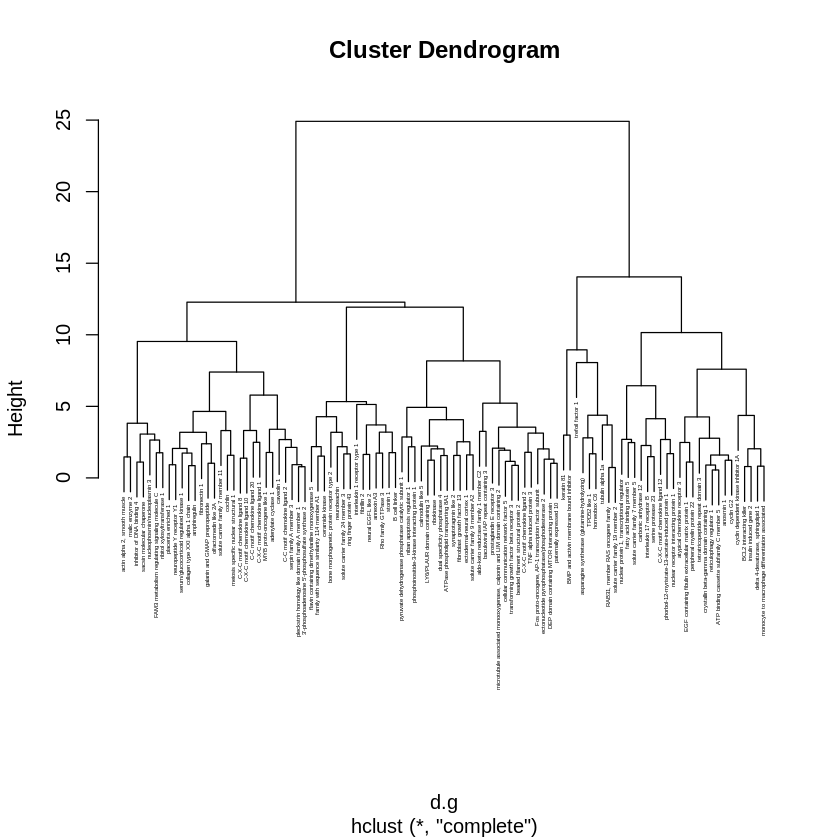

In [ ]:
# Hierarchical clustering of 100 top variance genes
gene.desc <- select(hgu133a.db, rownames(expdtgeoFilt), c("GENENAME"))
gene.names <- gene.desc[genes.var.select, ]$GENENAME
probe.names<- gene.desc[genes.var.select, ]$PROBEID
d.g = dist(dat.s)
hc = hclust(d.g, method = "complete")
plot(hc, labels = gene.names, cex = 0.3)

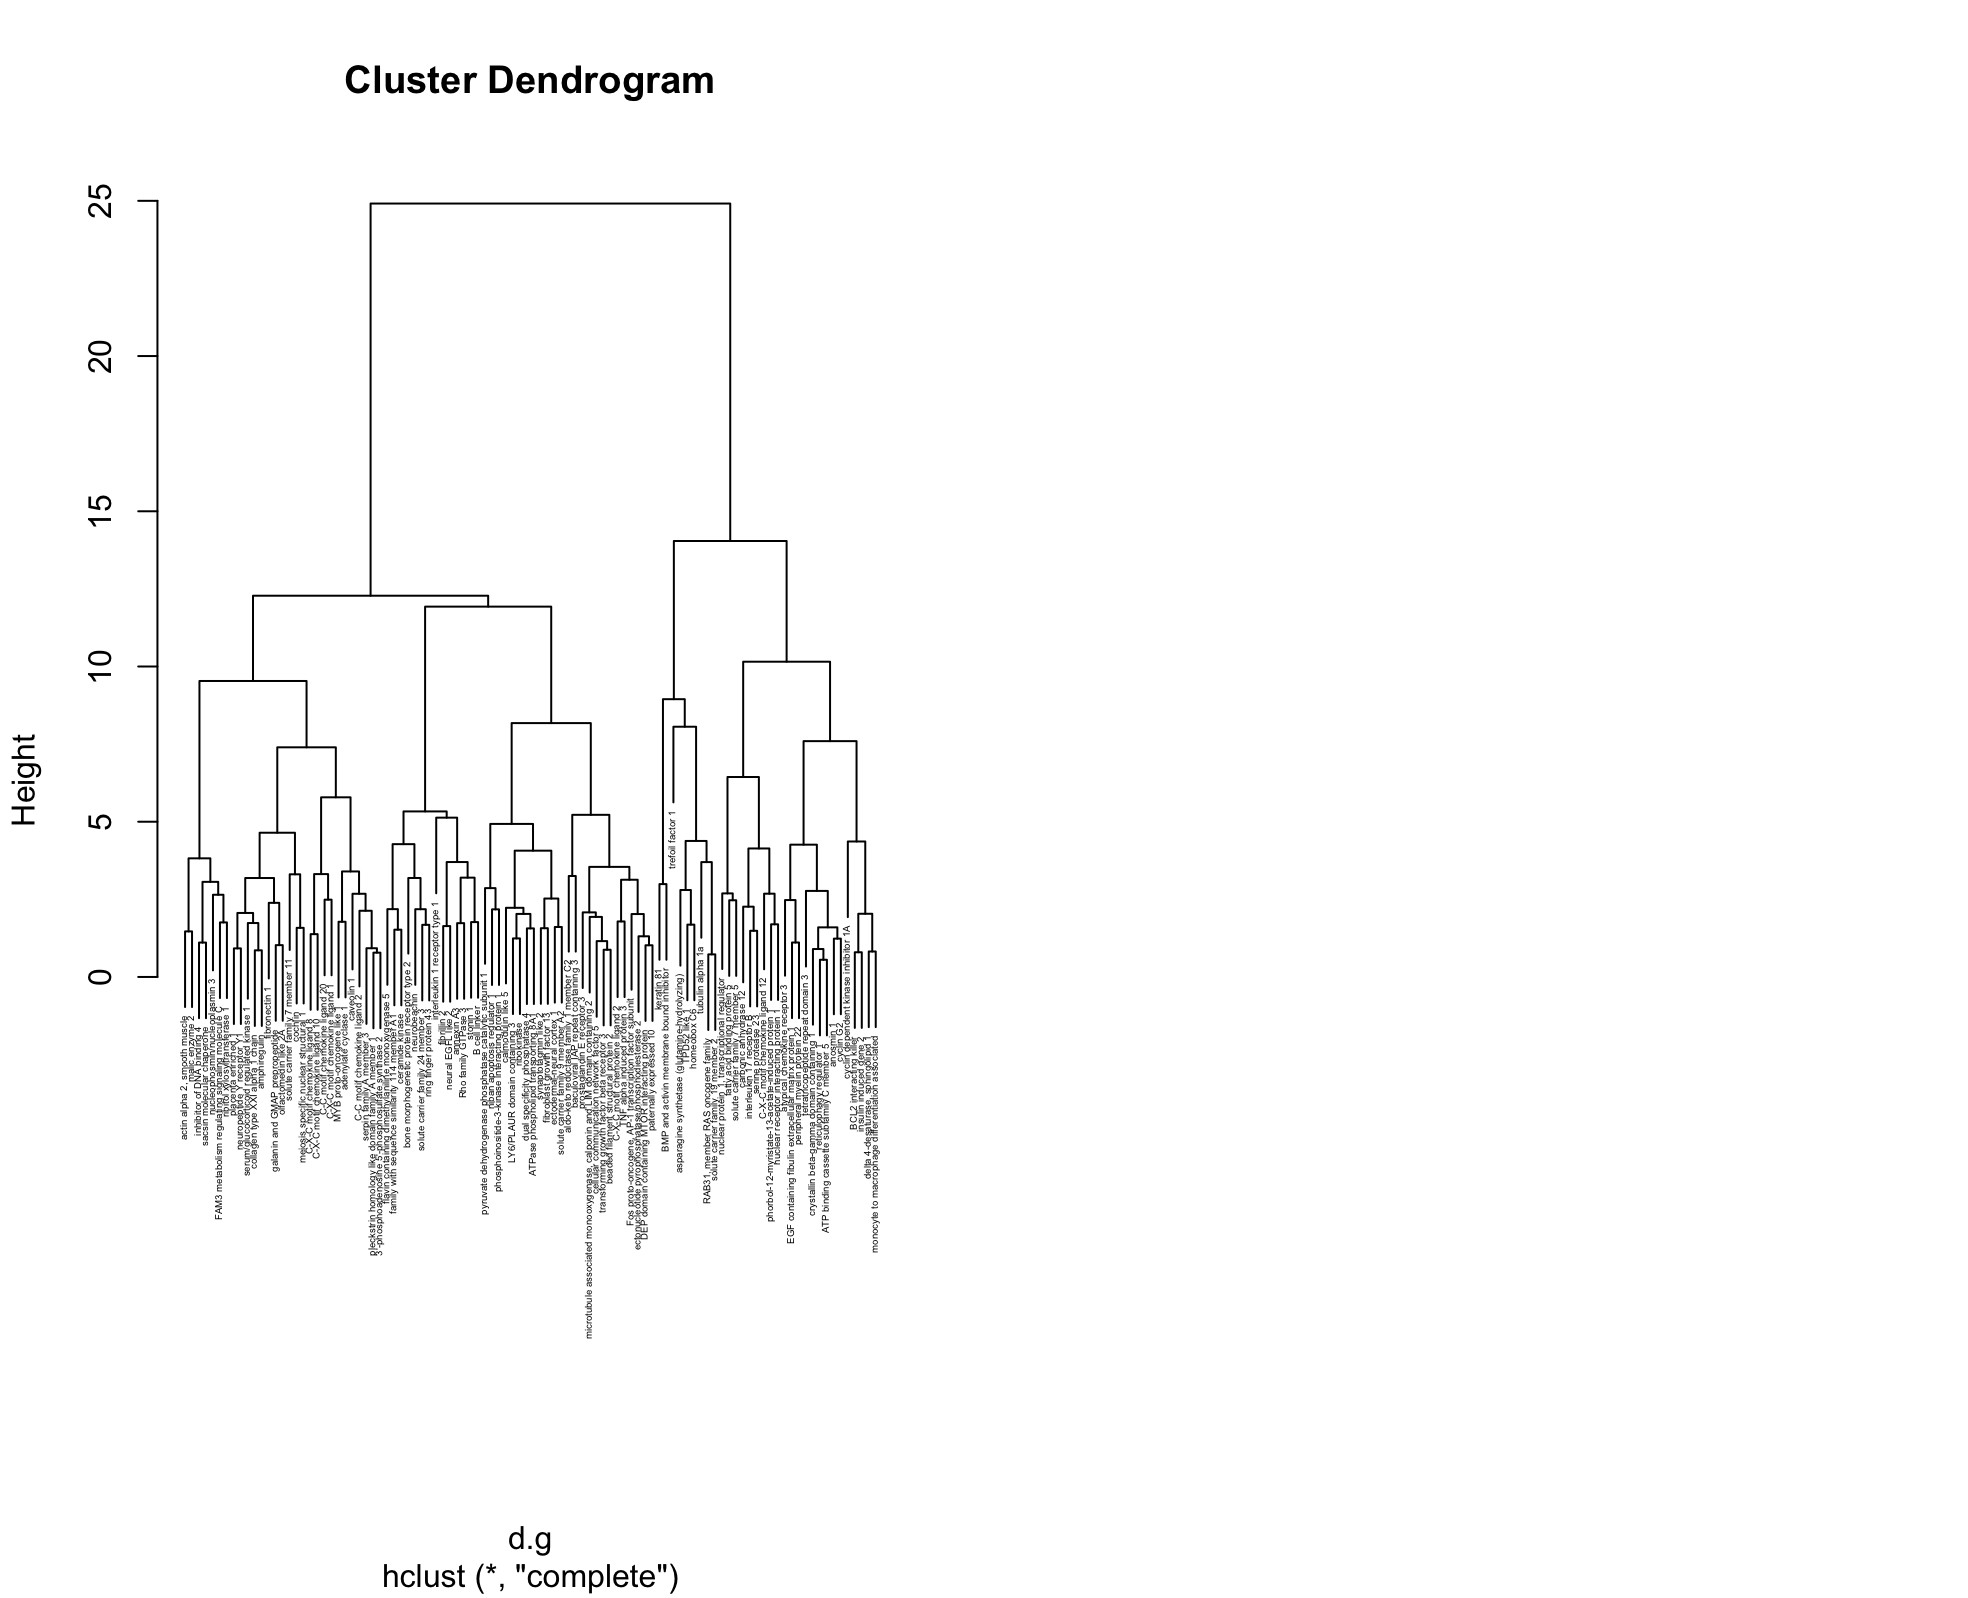

Pada dendrogram terlihat bahwa terbentuk beberapa subcluster, dan dua cluster utama dapat dibedakan dengan jelas.

Cluster pertama, yang mencakup gen-gen seperti actin alpha 2 (ACTA2), serum/glucocorticoid regulated kinase 1 (SGK1), dan interleukin 1 receptor type 1 (IL1R1), menunjukkan keragaman fungsi gen atau protein yang melibatkan berbagai proses biologis. Beberapa dari gen-gen ini, seperti collagen type XII alpha 1 chain (COL12A1) dan C-X-C motif chemokine ligand 8 (CXCL8), dapat terlibat dalam fungsi otot, sinyal molekuler, dan respons terhadap kemokin, dan proses metabolik. Gen dalam cluster ini mungkin terlibat dalam berbagai aspek fungsi seluler dan regulasi.

Sementara itu, cluster kedua, yang mencakup gen-gen seperti keratin 81 (KRT81), trefoil factor 1 (TFF1), dan cyclin G2 (CCNG2), tampaknya memiliki fungsi yang berbeda dibandingkan dengan Cluster pertama. Kehadiran gen-gen ini mengindikasikan keterlibatan dalam proses seperti struktur sel (misalnya, KRT81), perlindungan mukosa (misalnya, TFF1), dan regulasi siklus sel (misalnya, CCNG2). Perbedaan dalam komposisi genetik antara kedua cluster ini memberikan gambaran tentang diversitas biologis yang mungkin terjadi di antara gen-gen pada sampel atau kondisi yang dianalisis.

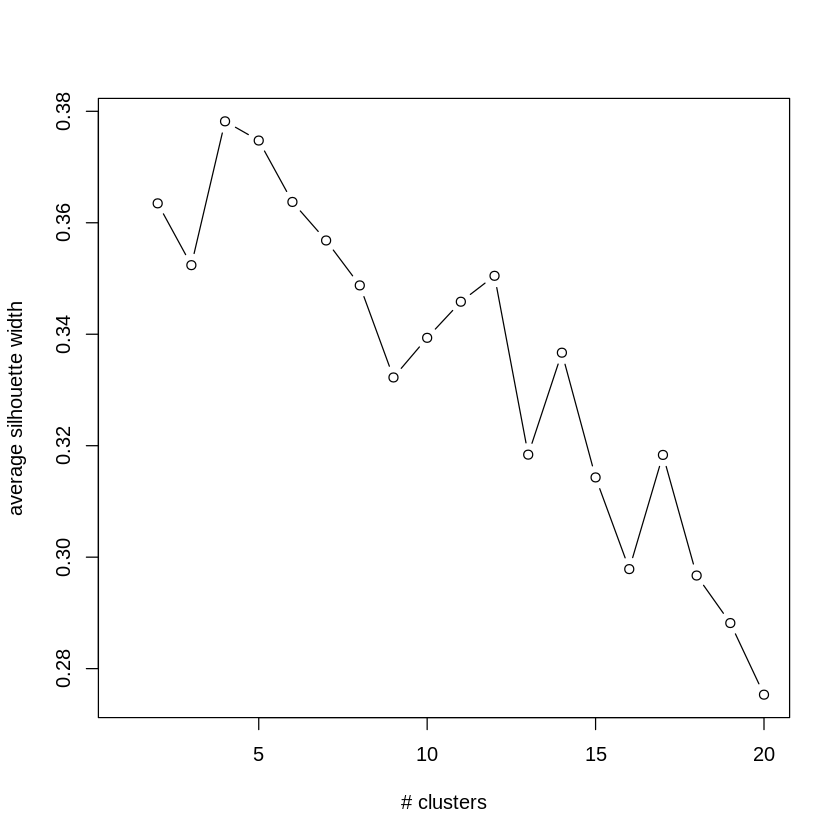

In [ ]:
asw = numeric()
for (k in 2:20) asw[k] = pam(dat.s, k)$silinfo$avg.width
# Average silhouette width of 100 top-variance genes for k=2:20 clusters.
plot(1:20, asw, xlab = "# clusters", ylab = "average silhouette width", type = "b")

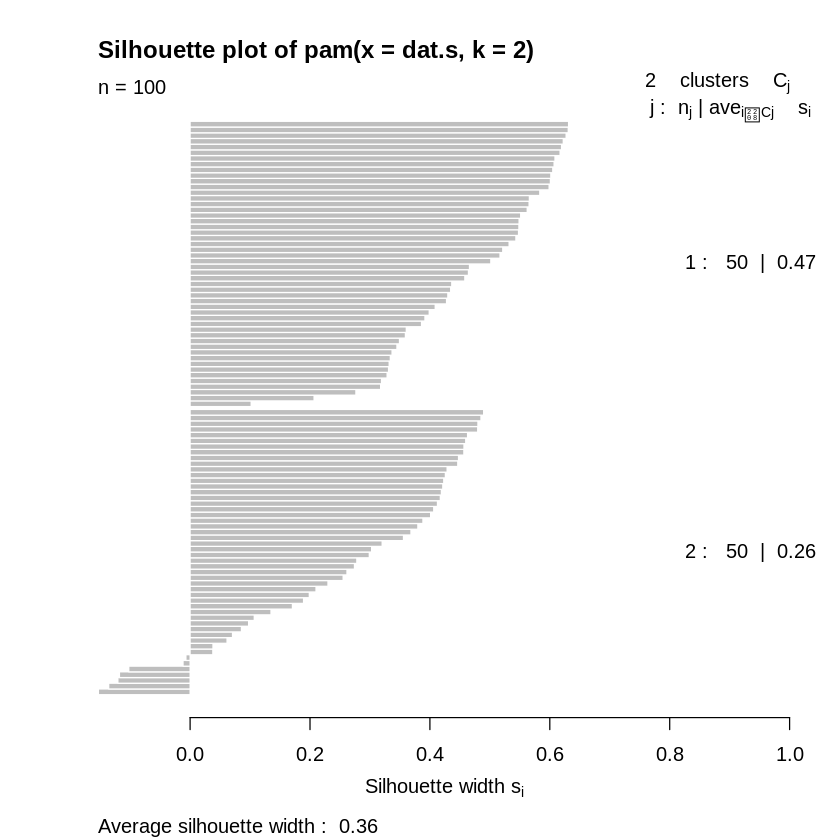

In [ ]:
# silhouette plot for k=2
plot(silhouette(pam(dat.s, 2)))

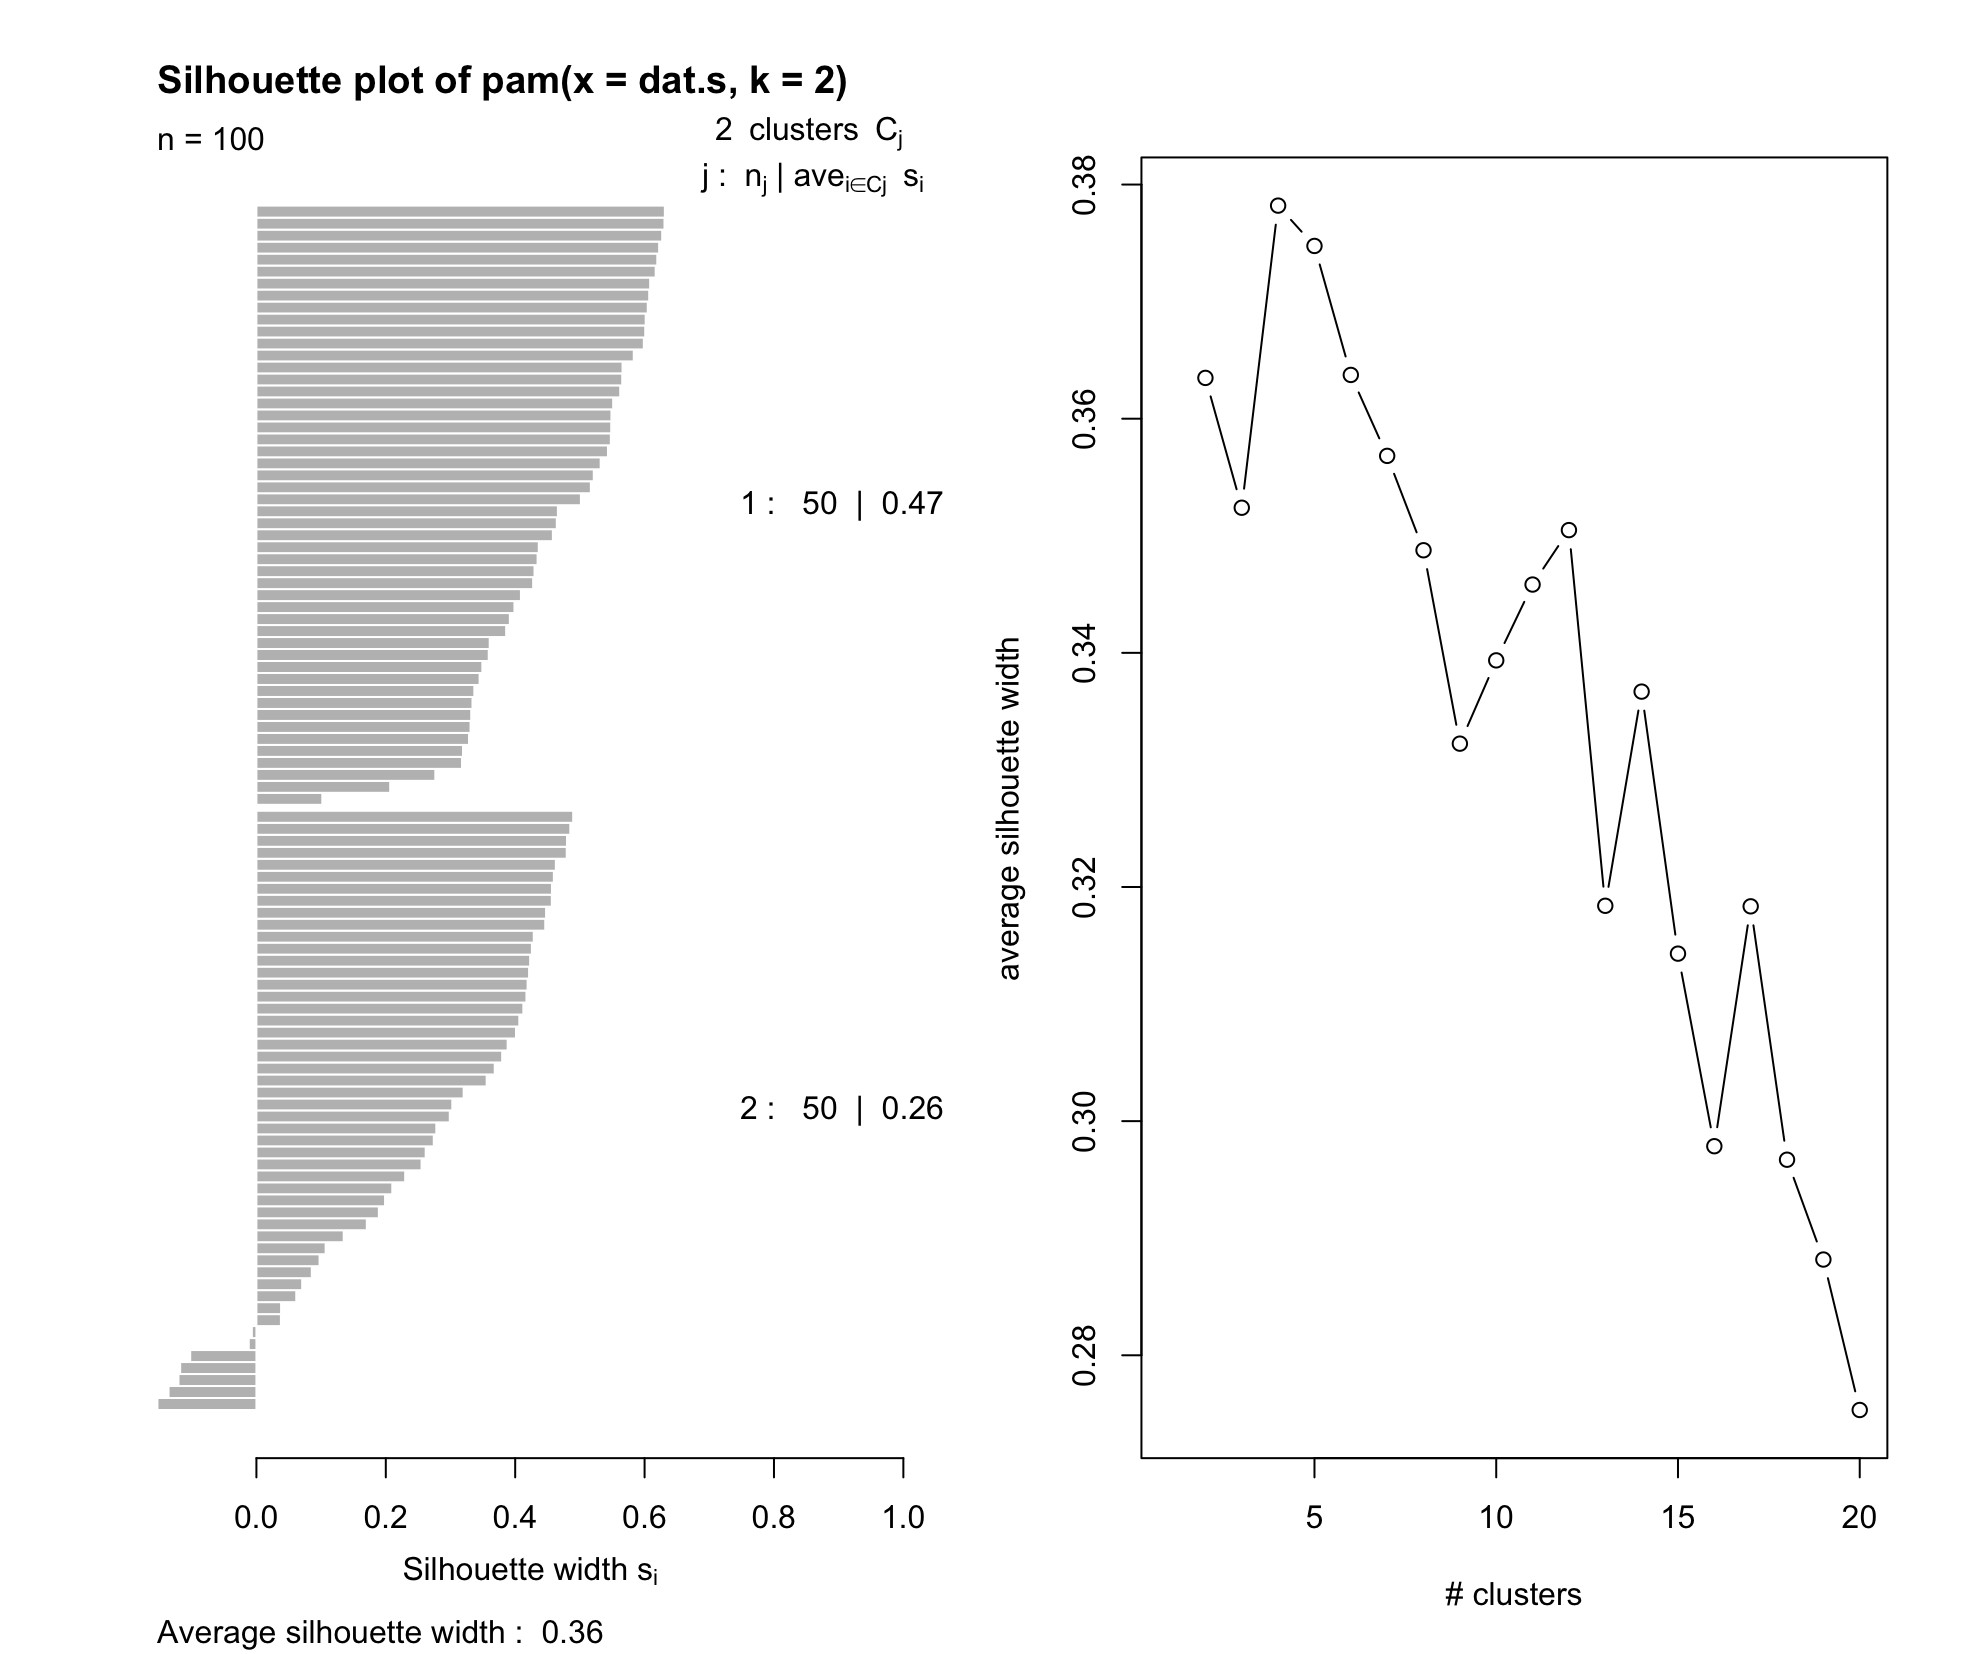

Meskipun dendrogram menunjukkan bahwa jumlah cluster optimal adalah 2, hasil analisis menggunakan silhouette plot (grafik kanan) menunjukkan bahwa jumlah cluster yang paling optimal sebenarnya adalah k=4. Silhouette plot memberikan visualisasi lebih detail terhadap kualitas pengelompokan data pada setiap cluster, dan pada k=4 terlihat tingkat keseragaman pengelompokan yang lebih tinggi dibandingkan dengan k=2.

Untuk memberikan pemahaman yang lebih rinci terkait dengan k=4, akan dilakukan pembuatan plot terkait. Hal ini akan memberikan pandangan lebih mendalam tentang struktur dan hubungan antar-cluster pada pengelompokan data tersebut.

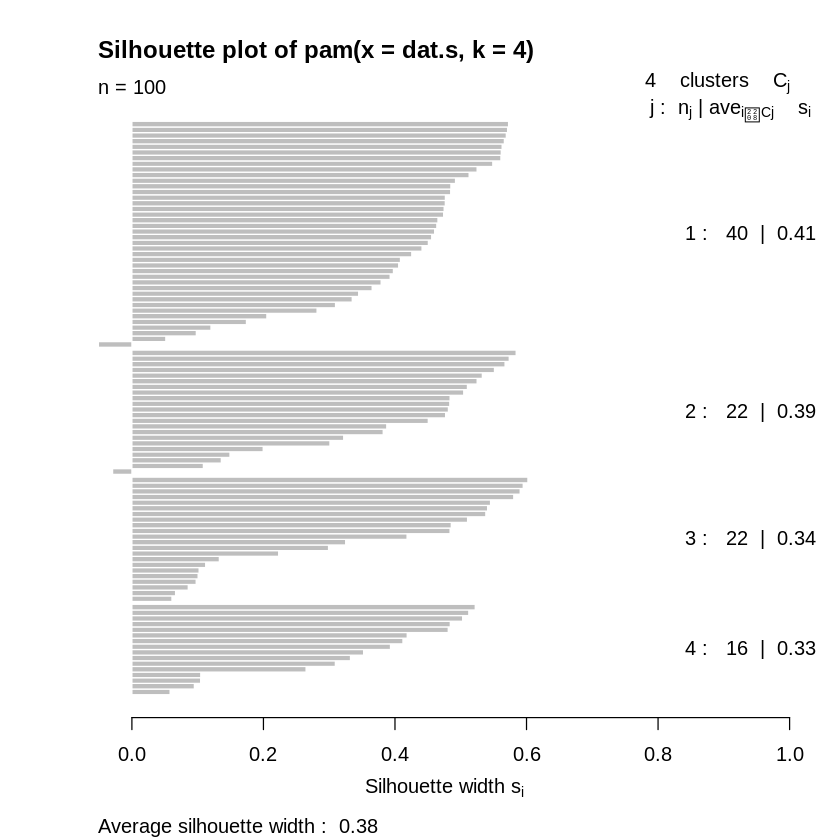

In [ ]:
# silhouette plot for k=2
plot(silhouette(pam(dat.s, 4)))

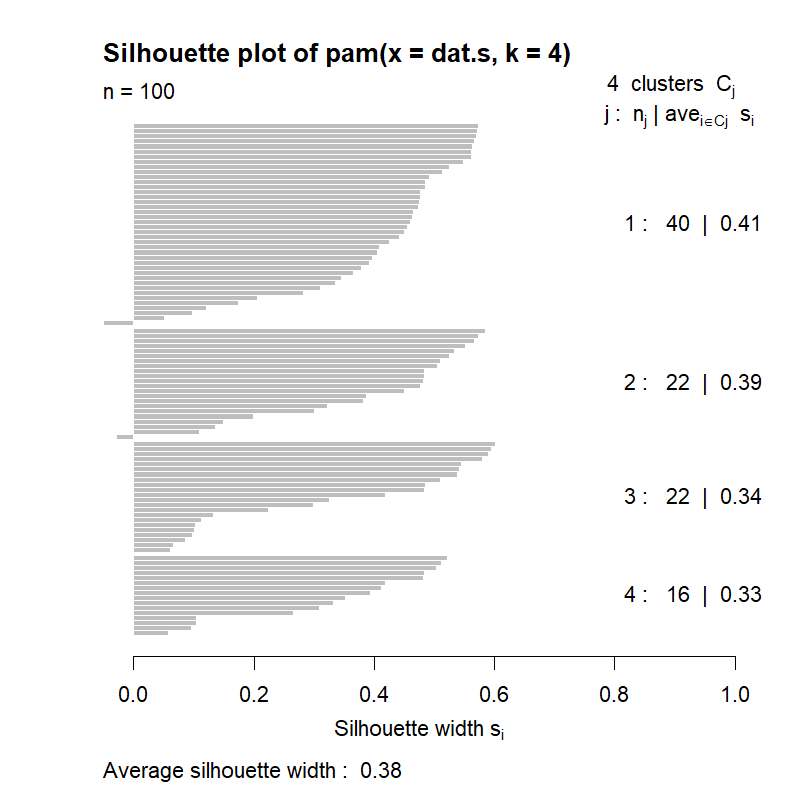

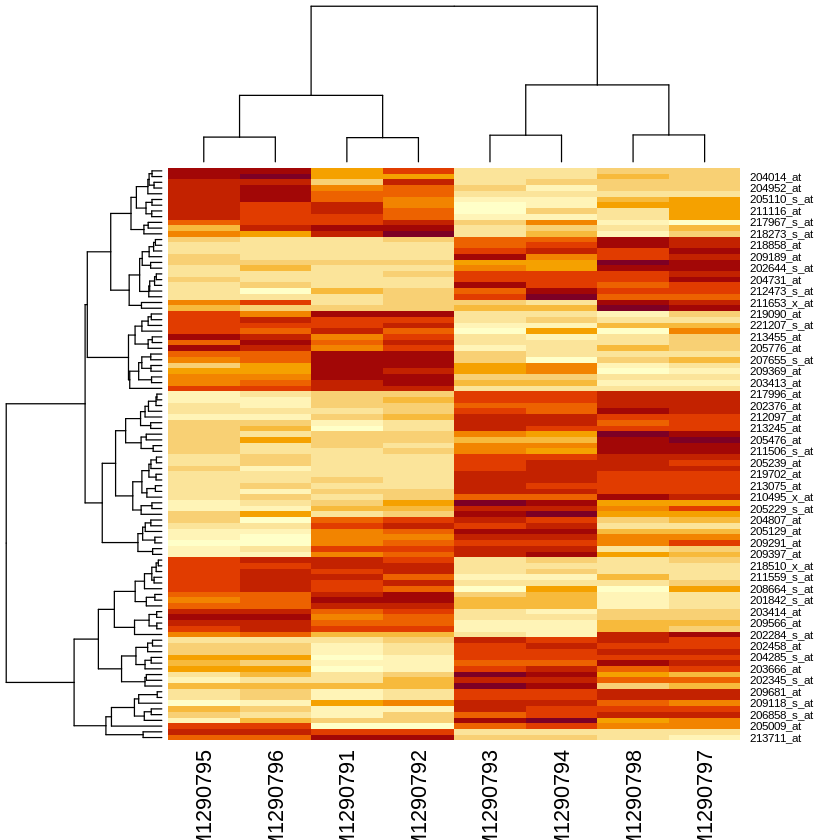

In [ ]:
#Heatmap of 100 selected high-variance genes. Rows and columns are hierarchically clustered.
heatmap(dat.s)

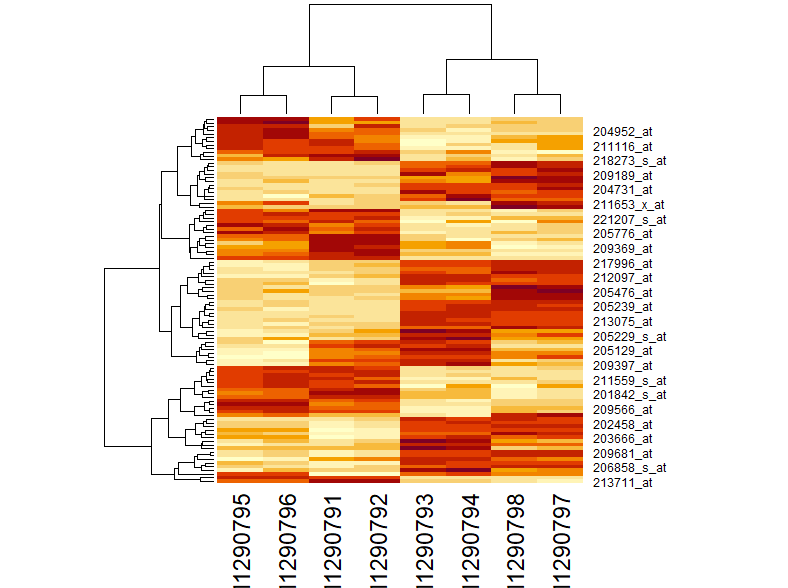

Secara garis besar, analisis pengelompokan menunjukkan bahwa baik sampel maupun gen dapat dibagi menjadi empat cluster utama. Secara visual, terlihat adanya korelasi yang signifikan antara beberapa kelompok sampel dan kelompok gen tertentu. Misalnya, cluster sampel GSM1290795,  GSM1290796 dan cluster sampel GSM1290791, GSM1290792. Hal serupa juga terlihat pada cluster sampel GSM1290793, GSM1290794, dan cluster sampel GSM1290798 dan GSM1290797

Akan diambil sebuah contoh menggunakan cluster sampel GSM1290795, dan GSM1290796. Dilihat dalam heatmap bahwa sampel tersebut memiliki kolerasi yang cukup tinggi untuk pada gen 204952_at, artinya kedua sampel tersebut memiliki tingkat ekspresi gen 204952_at yang mirip.

Korelasi yang tinggi antara kelompok sampel dan kelompok gen menunjukkan adanya pola hubungan yang erat di antara karakteristik genetik dan respons sampel terhadap kondisi atau faktor tertentu. Analisis ini dapat memberikan wawasan lebih lanjut tentang pola ekspresi gen dan potensi pengaruhnya terhadap respons sampel, membuka peluang untuk pemahaman yang lebih mendalam mengenai faktor-faktor yang memengaruhi fenotip tertentu.

#Kesimpulan

Dalam analisis, telah dilakukan eksplorasi beberapa metode pengelompokan data, termasuk hierarchical clustering, k-means, dan partitioning around medoids, serta mengukur kualitas pengelompokan menggunakan silhouette scores.

Dari hasil tersebut, ditemukan bahwa pemilihan gen dengan varian tinggi sebelum melakukan pengelompokan dapat meningkatkan kualitas hasil, memberikan gambaran yang lebih baik tentang pola hubungan antar sampel atau gen. Hal ini terlihat dari peningkatan average silhouette width pada jumlah cluster yang optimal.
